In [1]:
import pandas as pd
import os
from scipy import optimize
from Piecewise import *

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pathlib import Path

In [3]:
results_folder = './results/'
os.makedirs(results_folder, exist_ok = True)
os.makedirs(results_folder+'figures/', exist_ok = True)

In [4]:
# path to all preprocessed data
all_pre = pd.read_csv('./dat/pmg_preprocessed.csv', index_col = [0,1])

In [5]:
samples = pd.unique(all_pre.index.get_level_values(0))

In [6]:
to_cons = {}
for samp in samples:
    to_cons[samp] = all_pre.loc[samp]

In [7]:
direc = {}
for samp in samples:
    gene = samp.split('_')[0]
    date = samp.split('_')[1]
    direc[samp] = results_folder+gene+'/'+date+'/'
    os.makedirs(direc[samp], exist_ok = True)

Byn_200901
Fitting...
[12, 22, 40]
Byn_200902
Fitting...
[12, 21, 38]
Byn_200903
Fitting...
[11, 21, 37]
Byn_200904
Fitting...
[7, 16, 33]
Tll_200917
Fitting...
[9, 20, 36]
Tll_200918
Fitting...
[7, 16, 34]
Tll_200920
Fitting...
[12, 22, 38]
Tll_200921
Fitting...
[13, 23, 37]
Wg_201003
Fitting...
[13, 23, 41]
Wg_201005
Fitting...
[13, 22, 40]
Wg_201006
Fitting...
[13, 23, 42]
Wg_201114
Fitting...
[12, 22, 37]
Hkb_201006
Fitting...
[11, 21, 39]
Hkb_201110
Fitting...
[11, 21, 37]
Hkb_210415
Fitting...
[9, 18, 36]
Hkb_210416
Fitting...
[10, 19, 36]
Fkh_200906
Fitting...
[9, 19, 39]
Fkh_200907
Fitting...
[8, 17, 34]
Fkh_200908
Fitting...
[9, 18, 33]
Fkh_200909
Fitting...
[8, 17, 35]


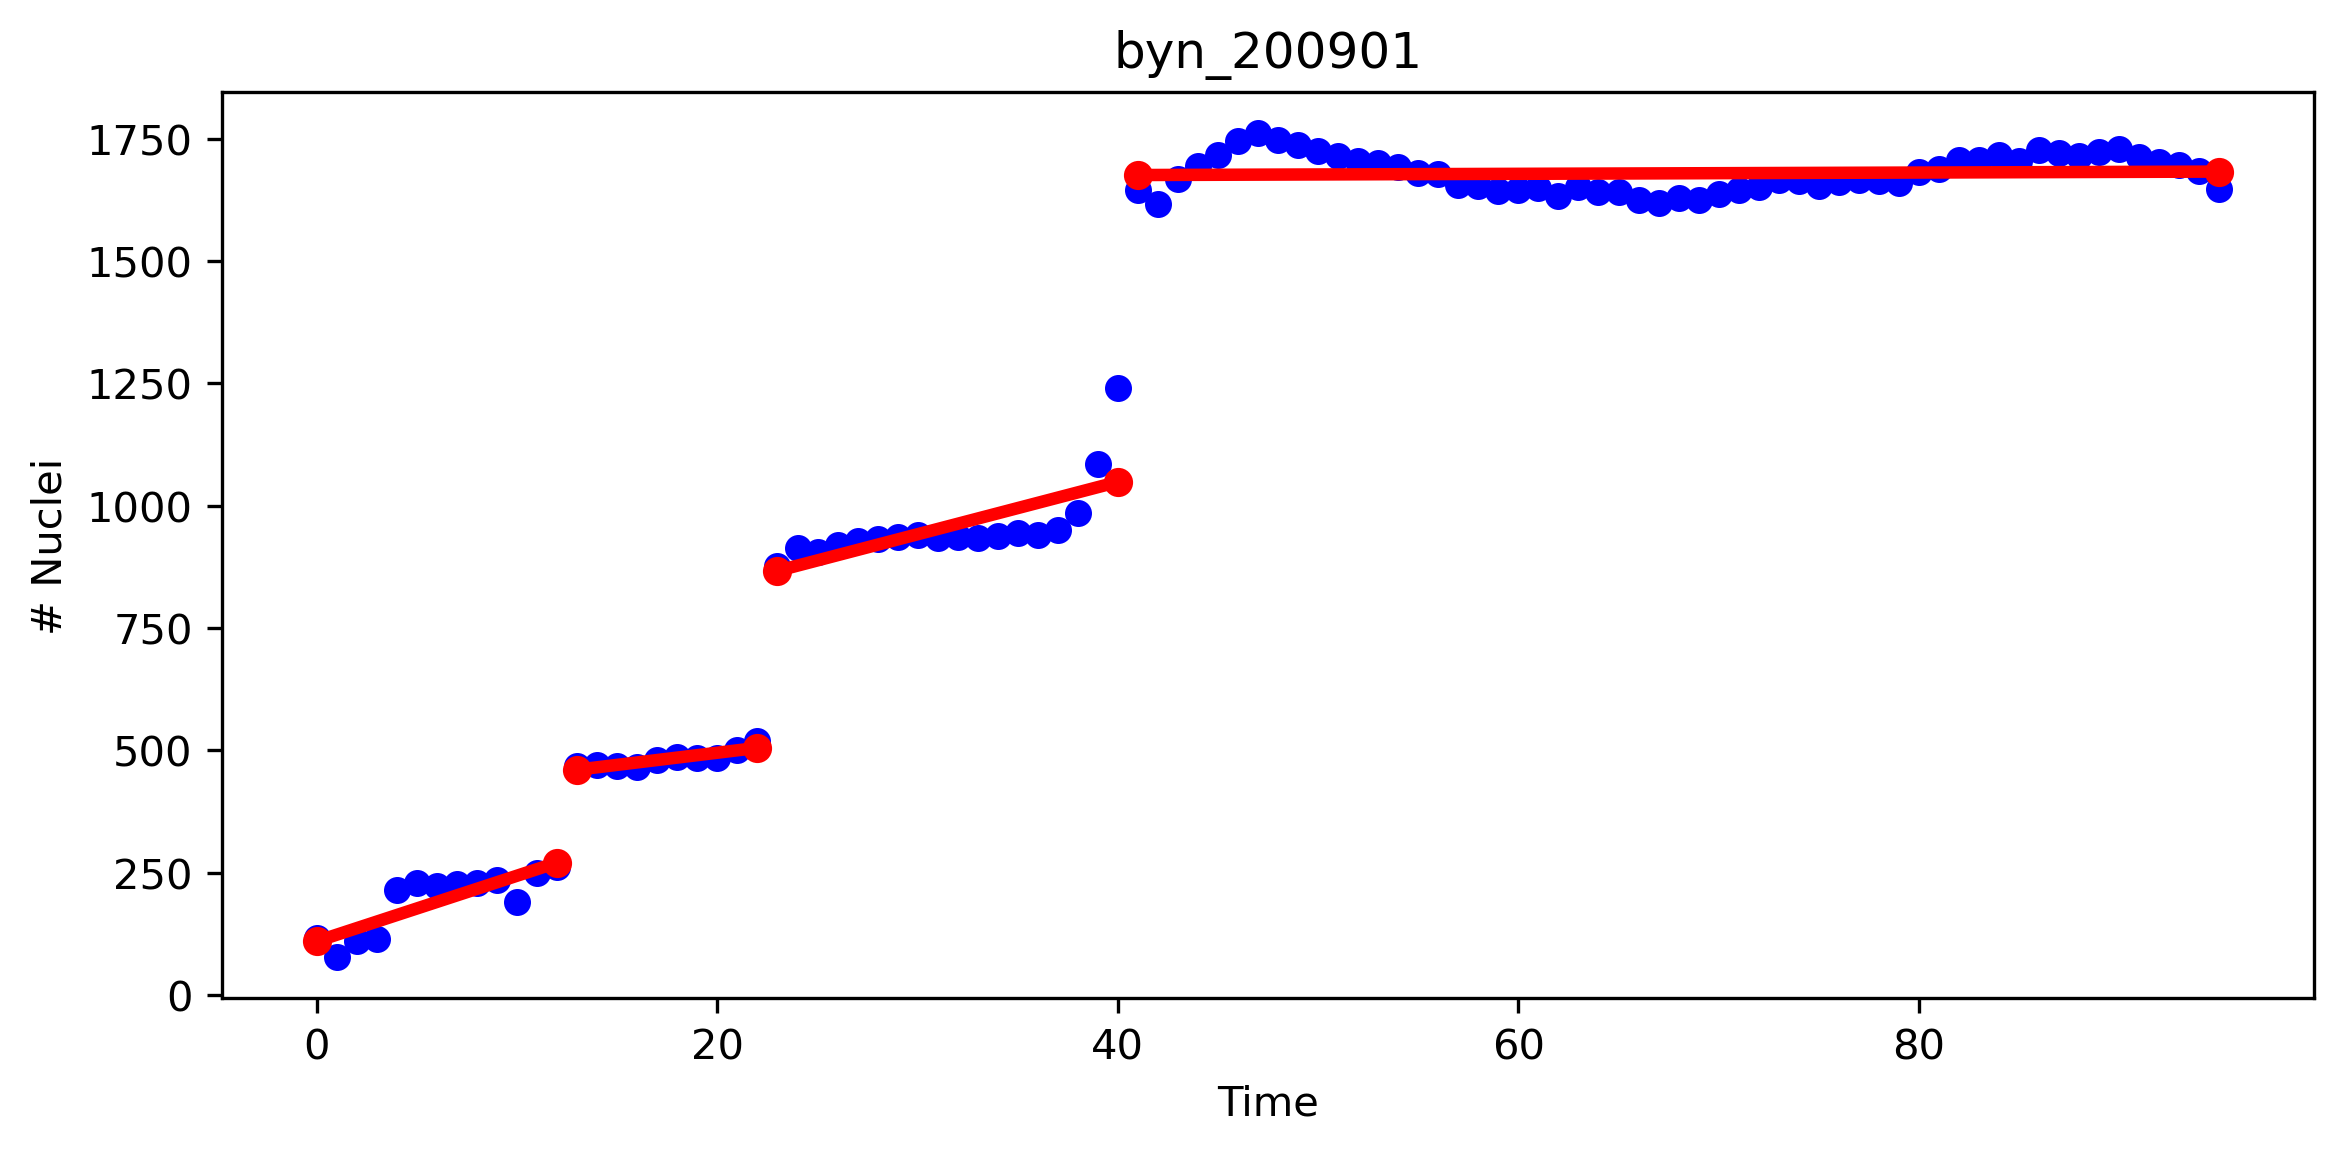

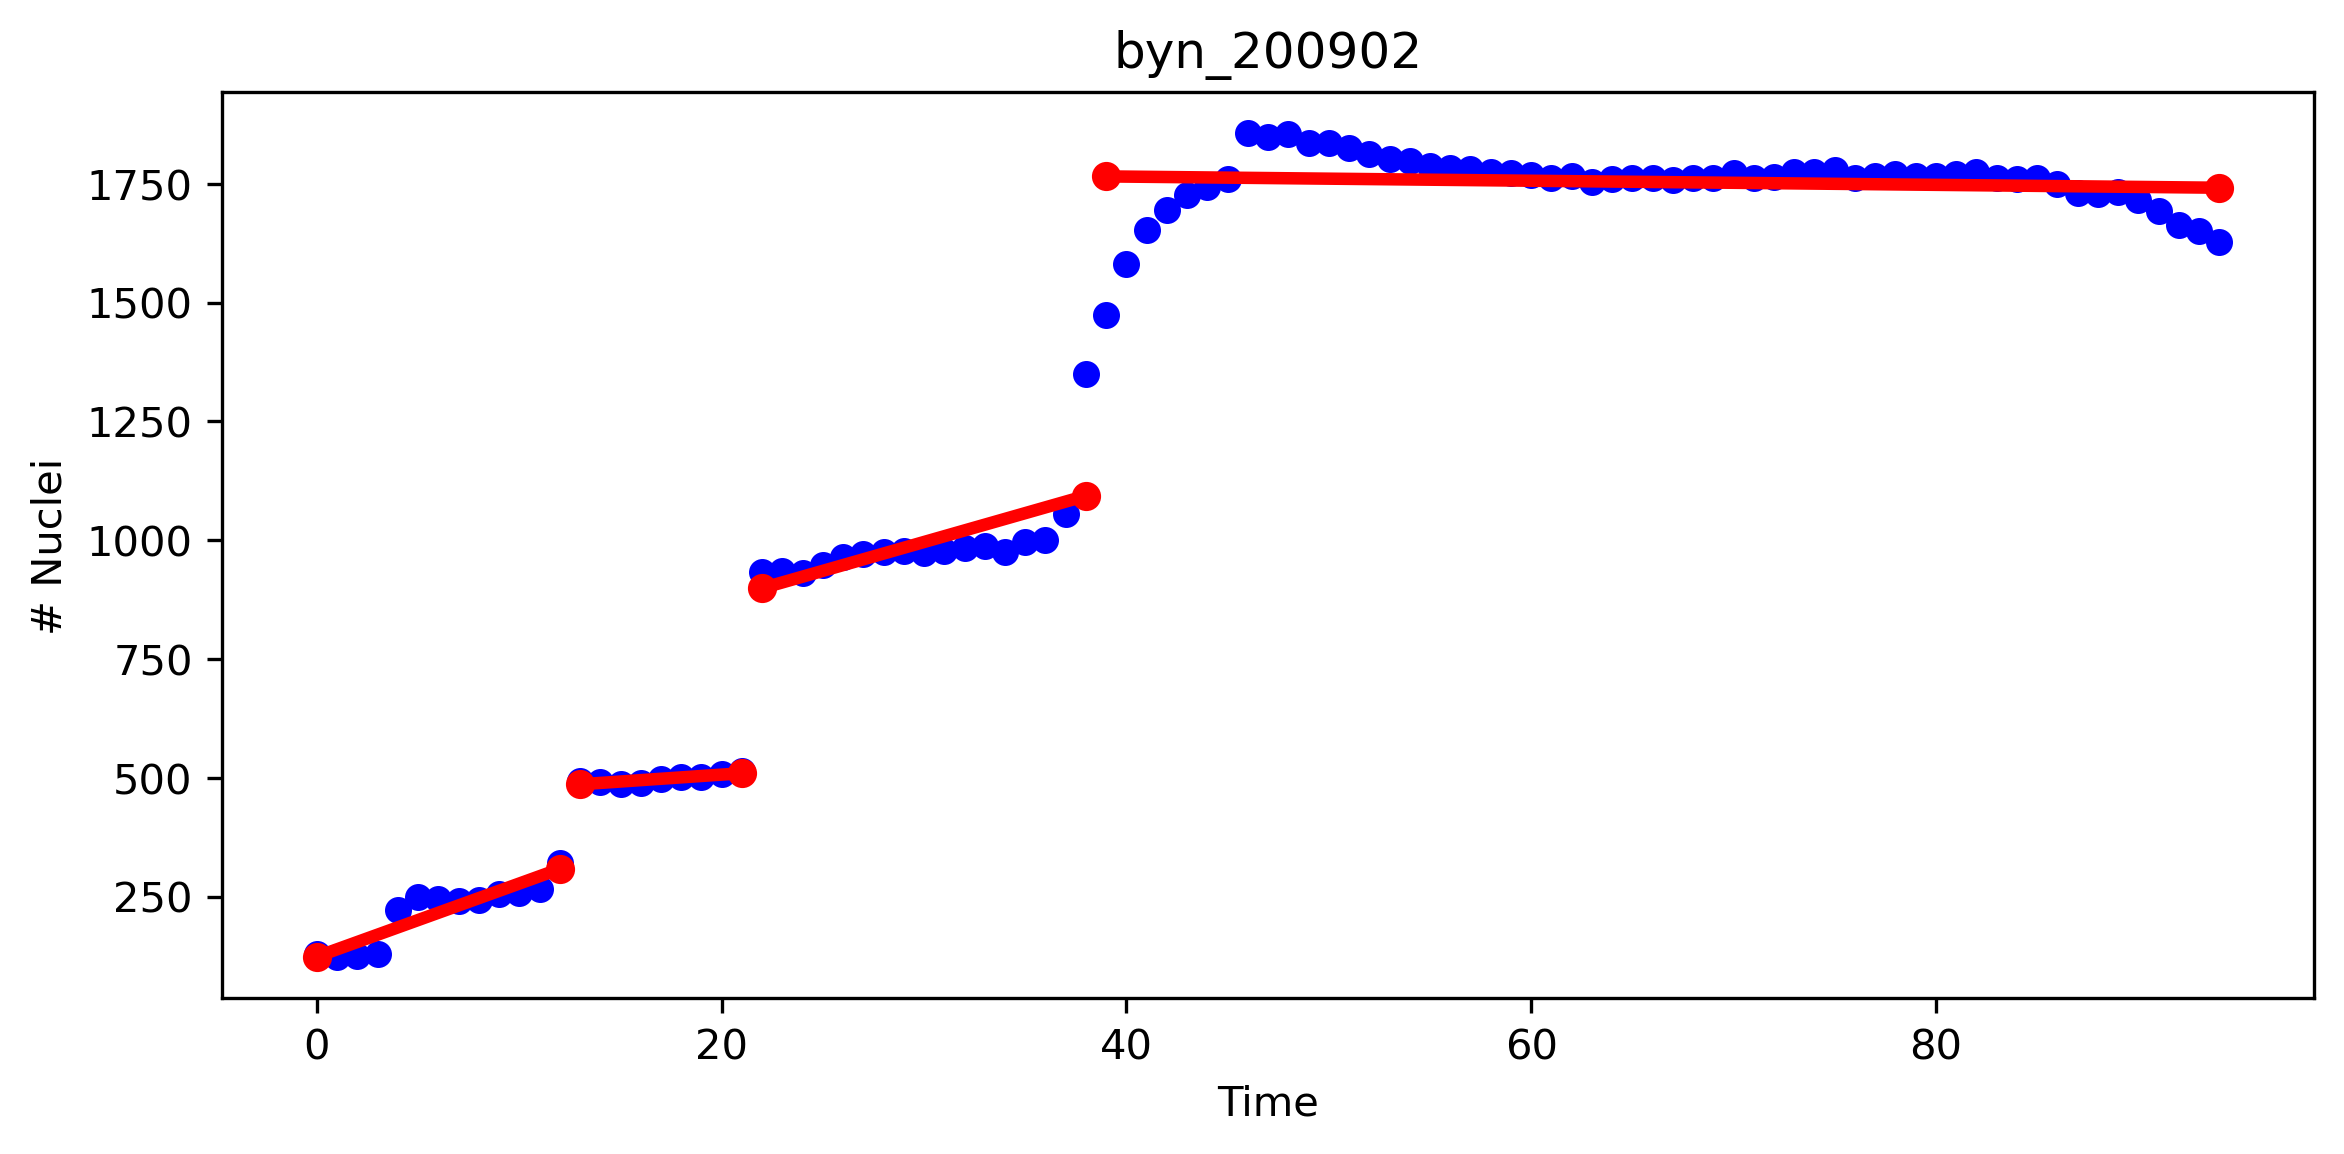

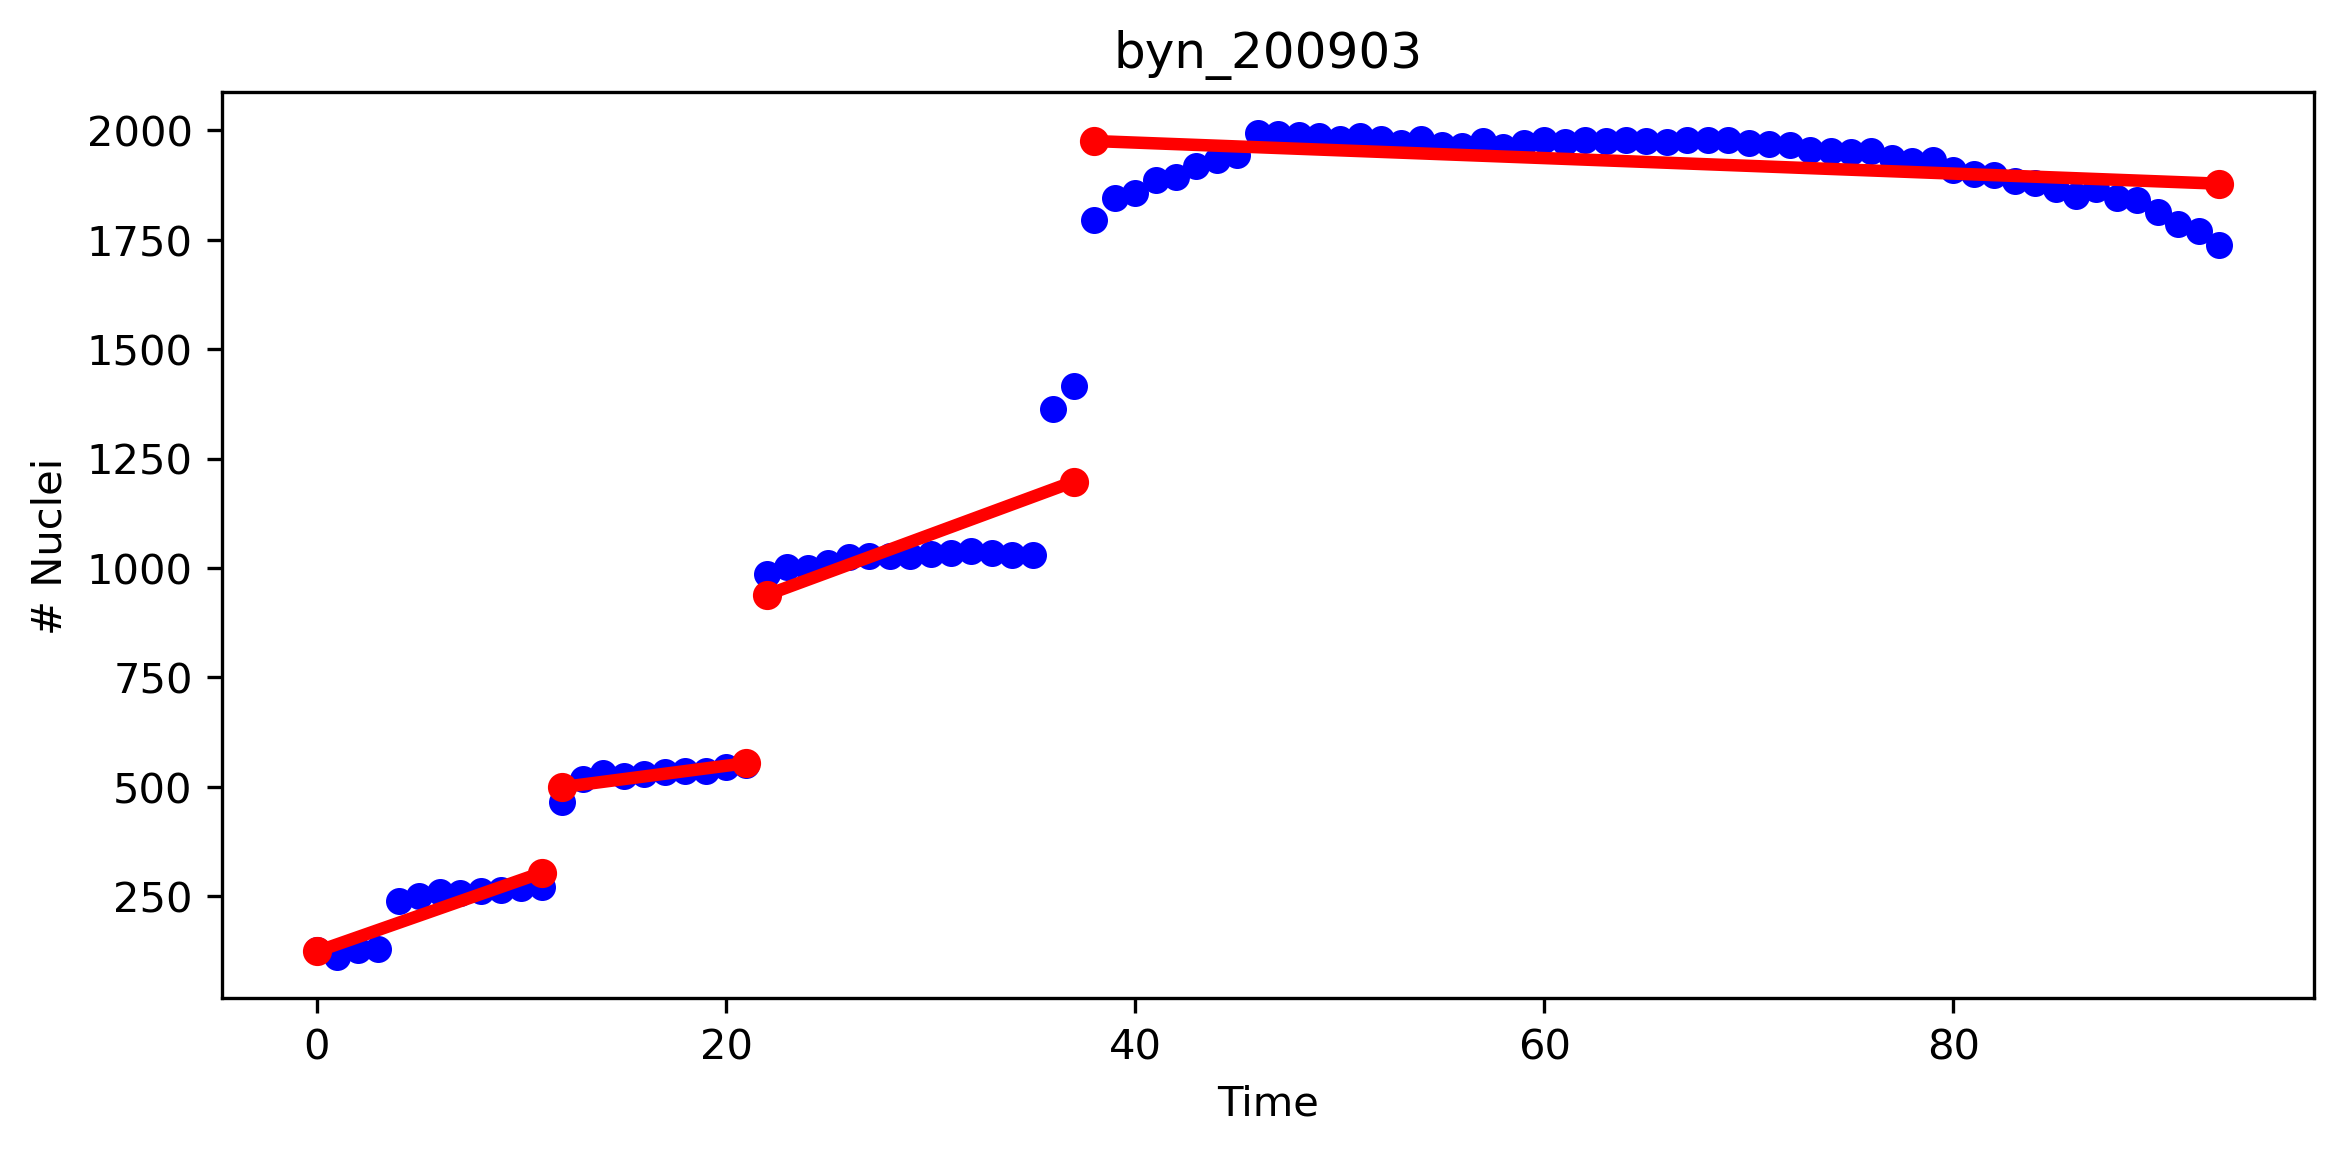

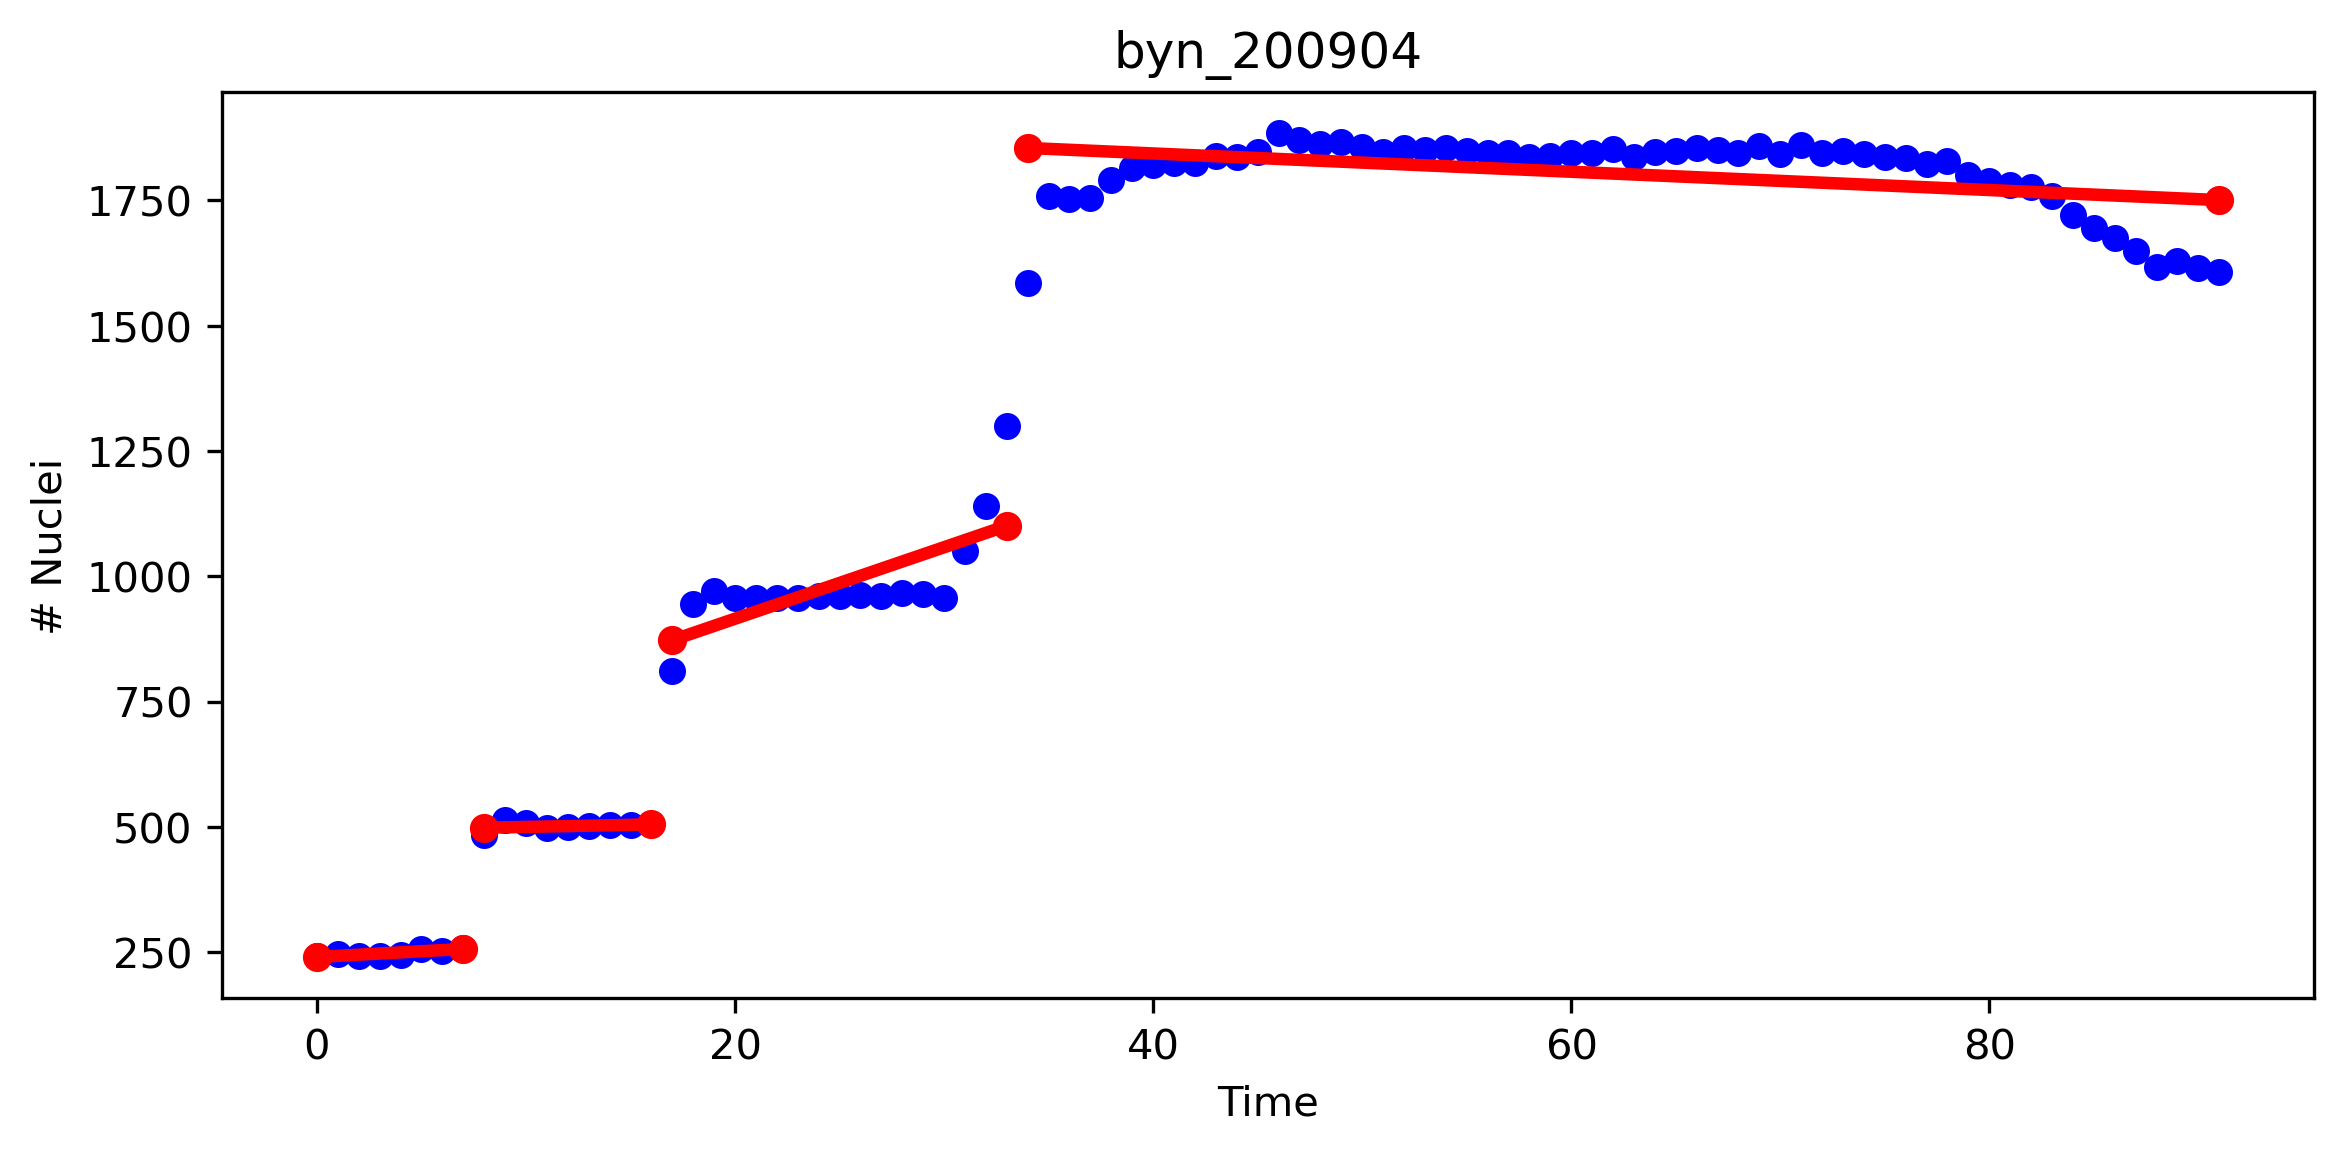

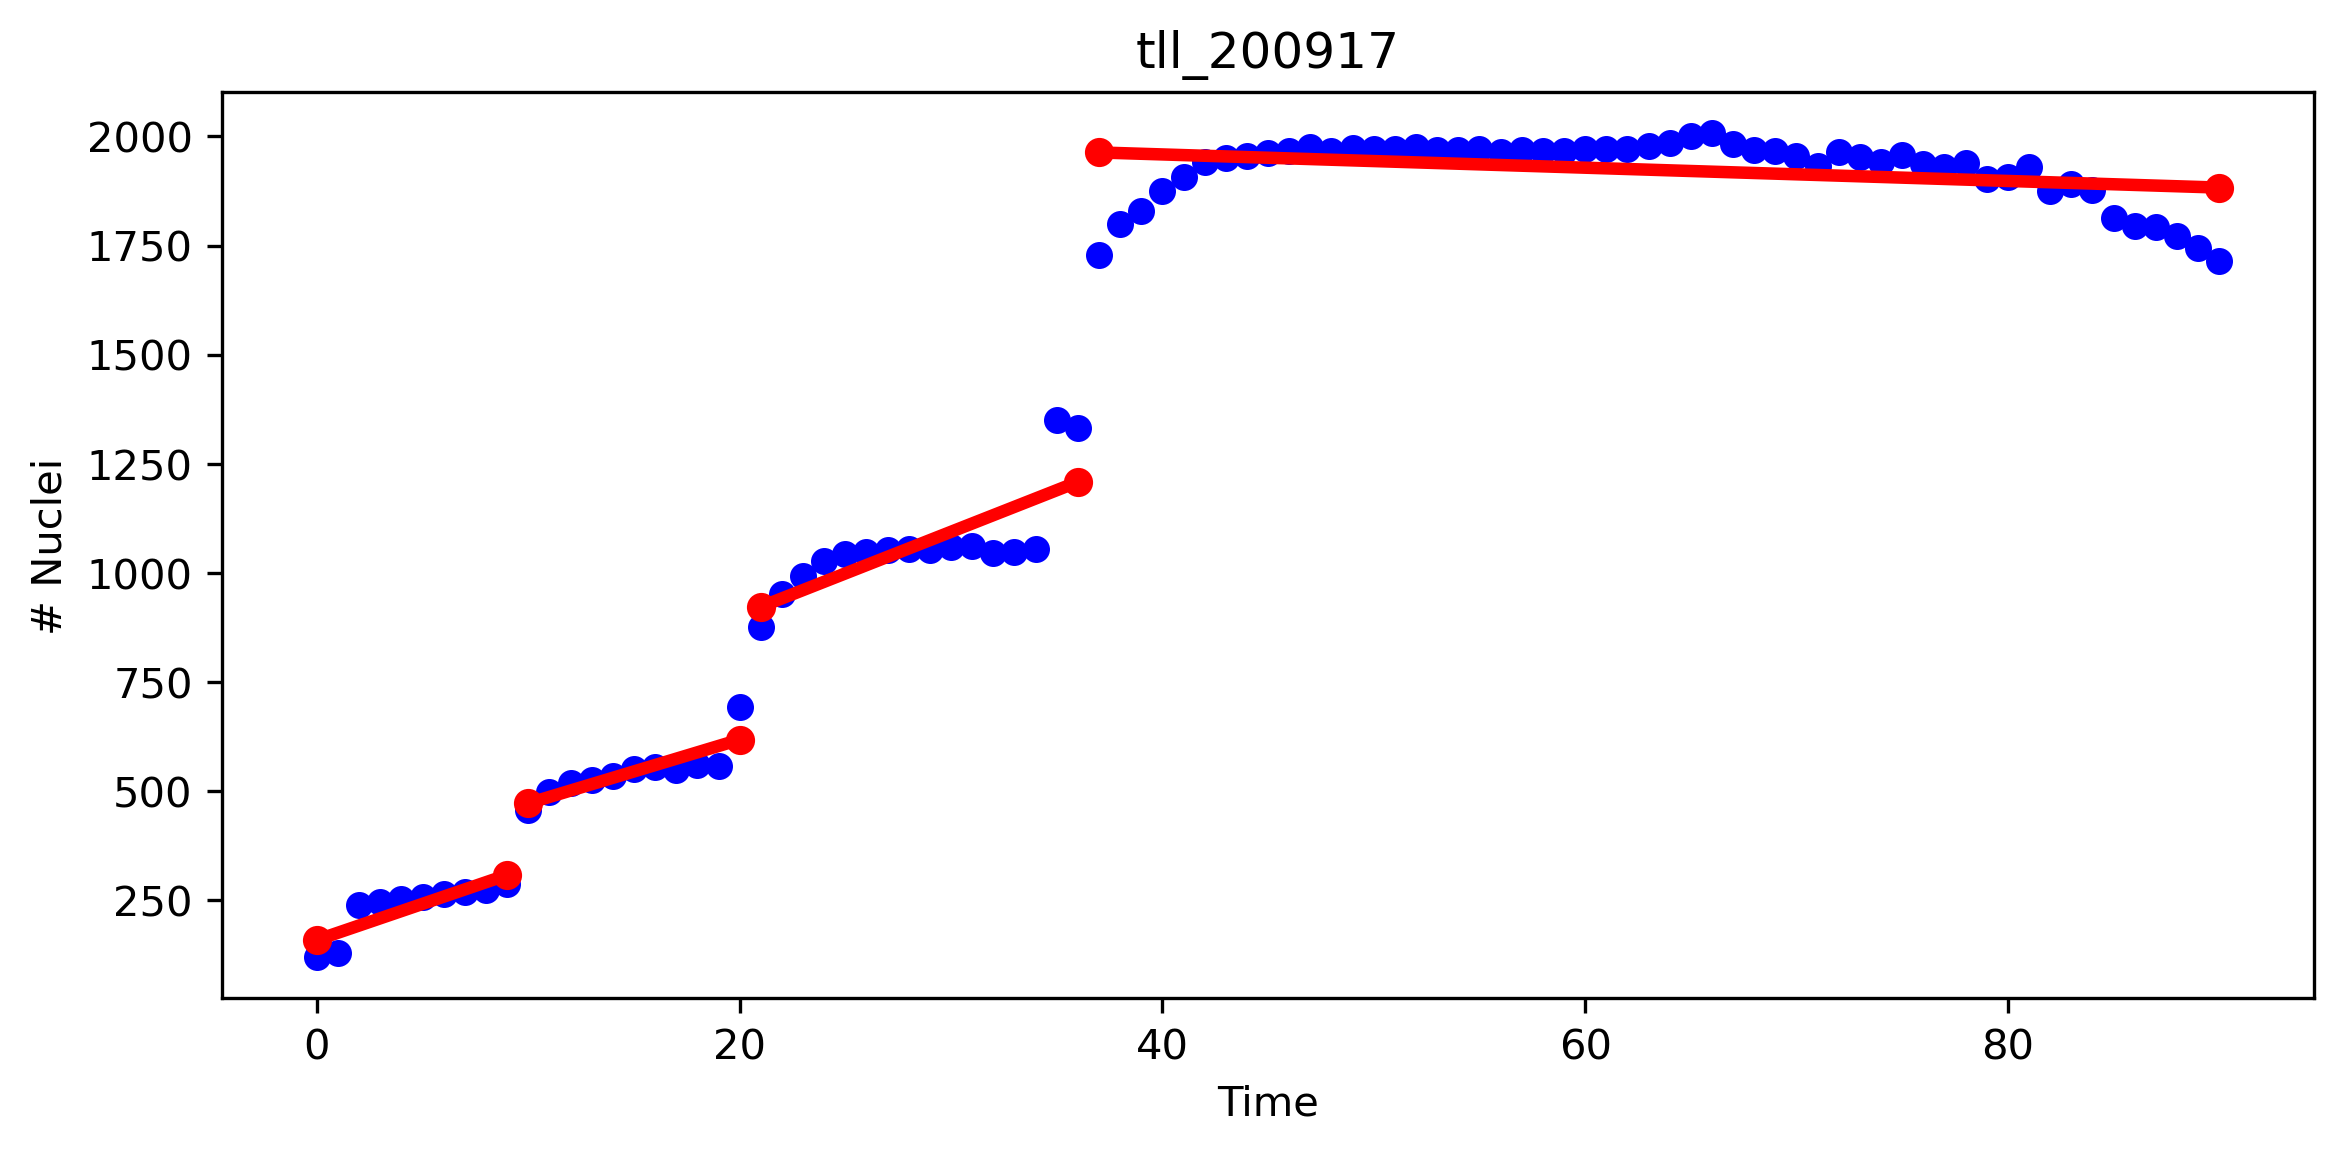

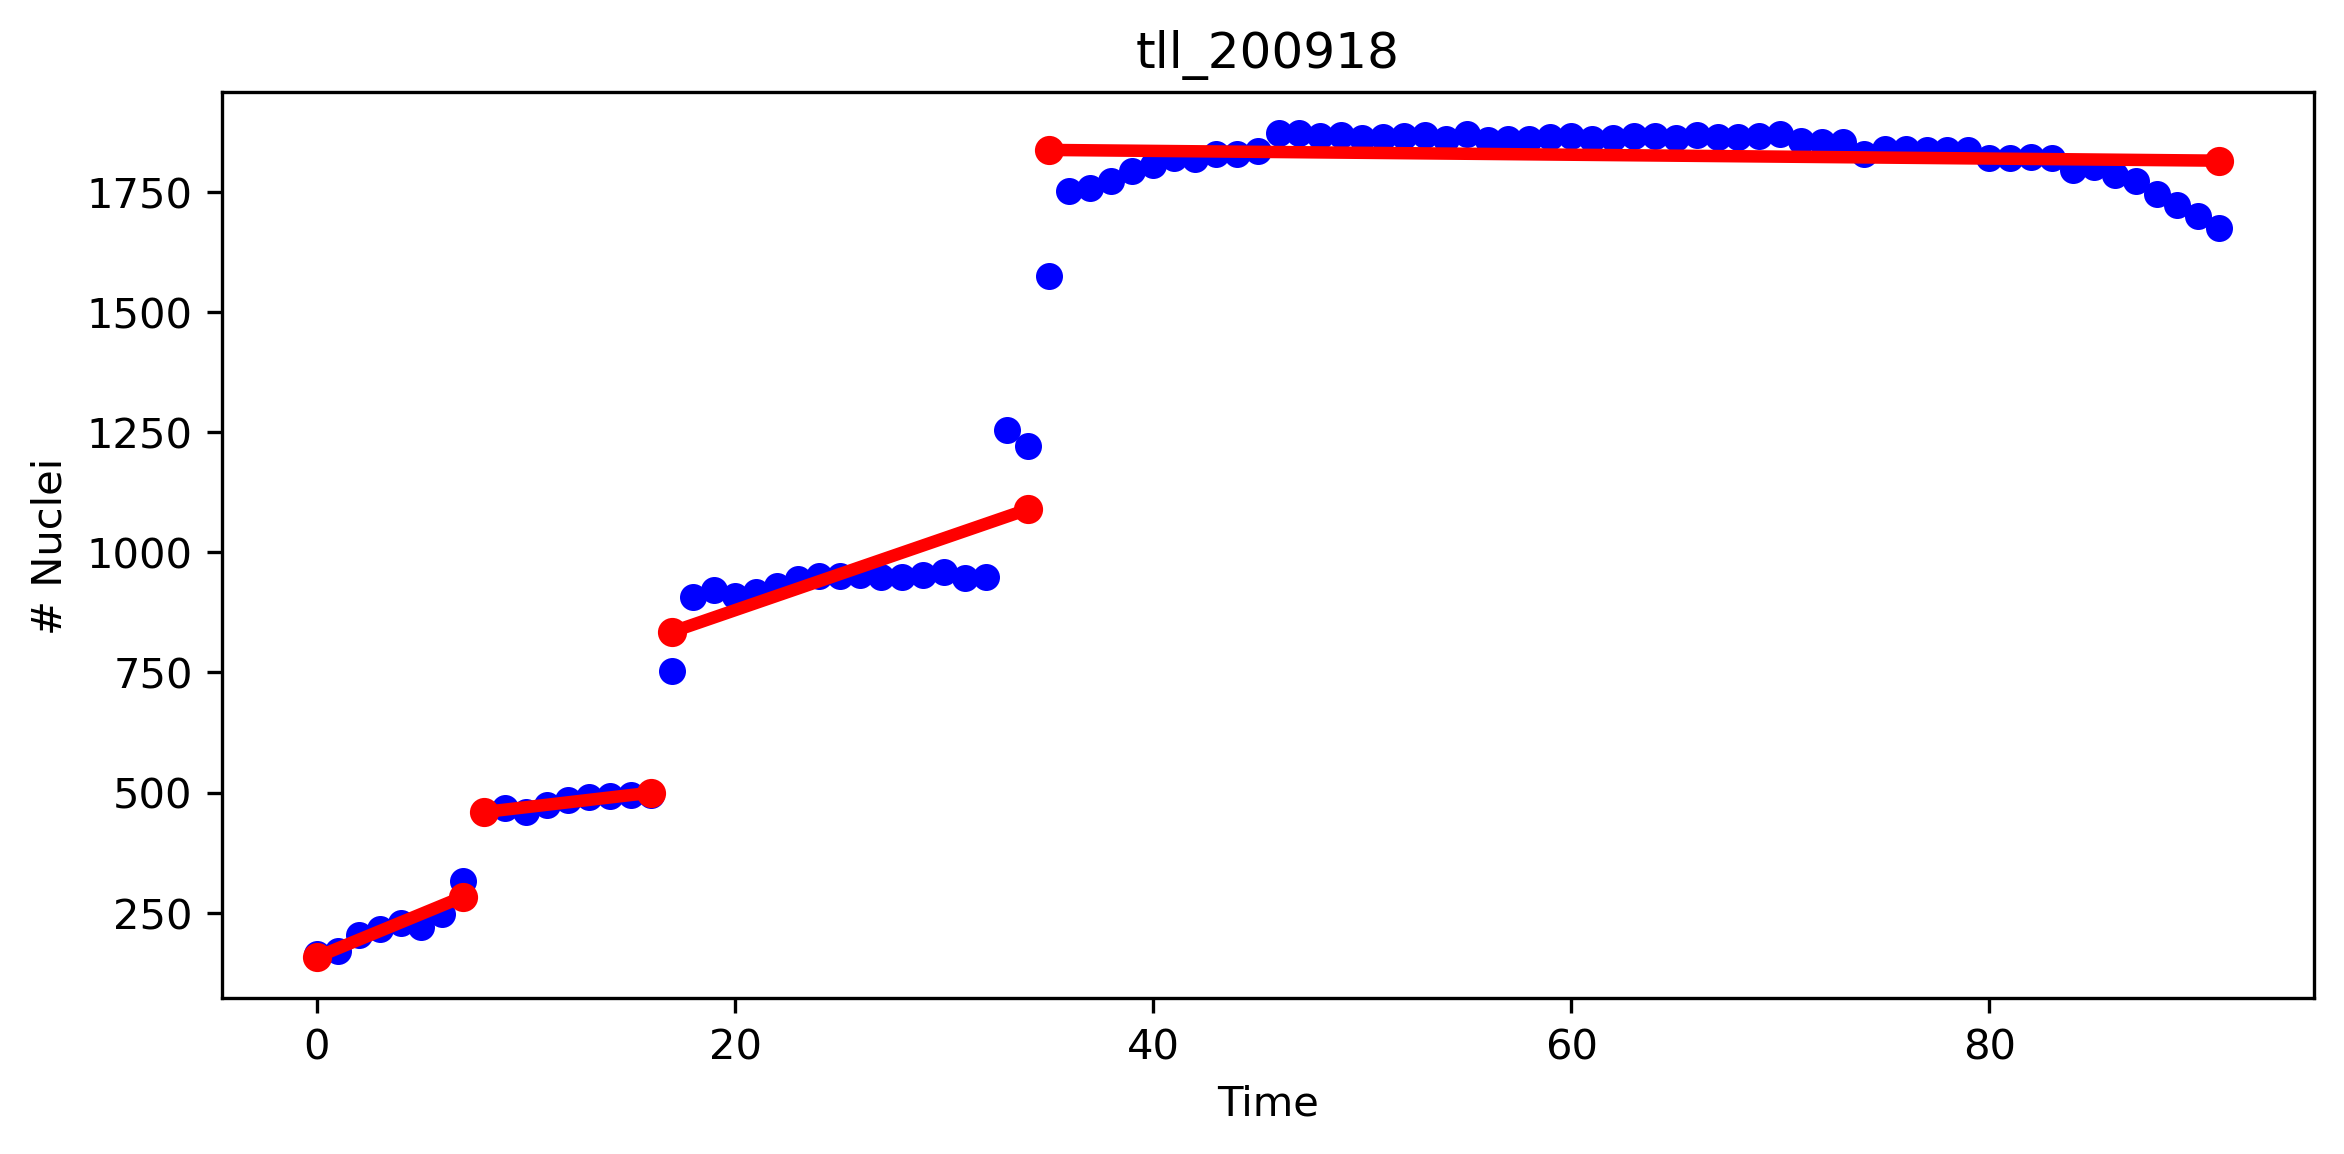

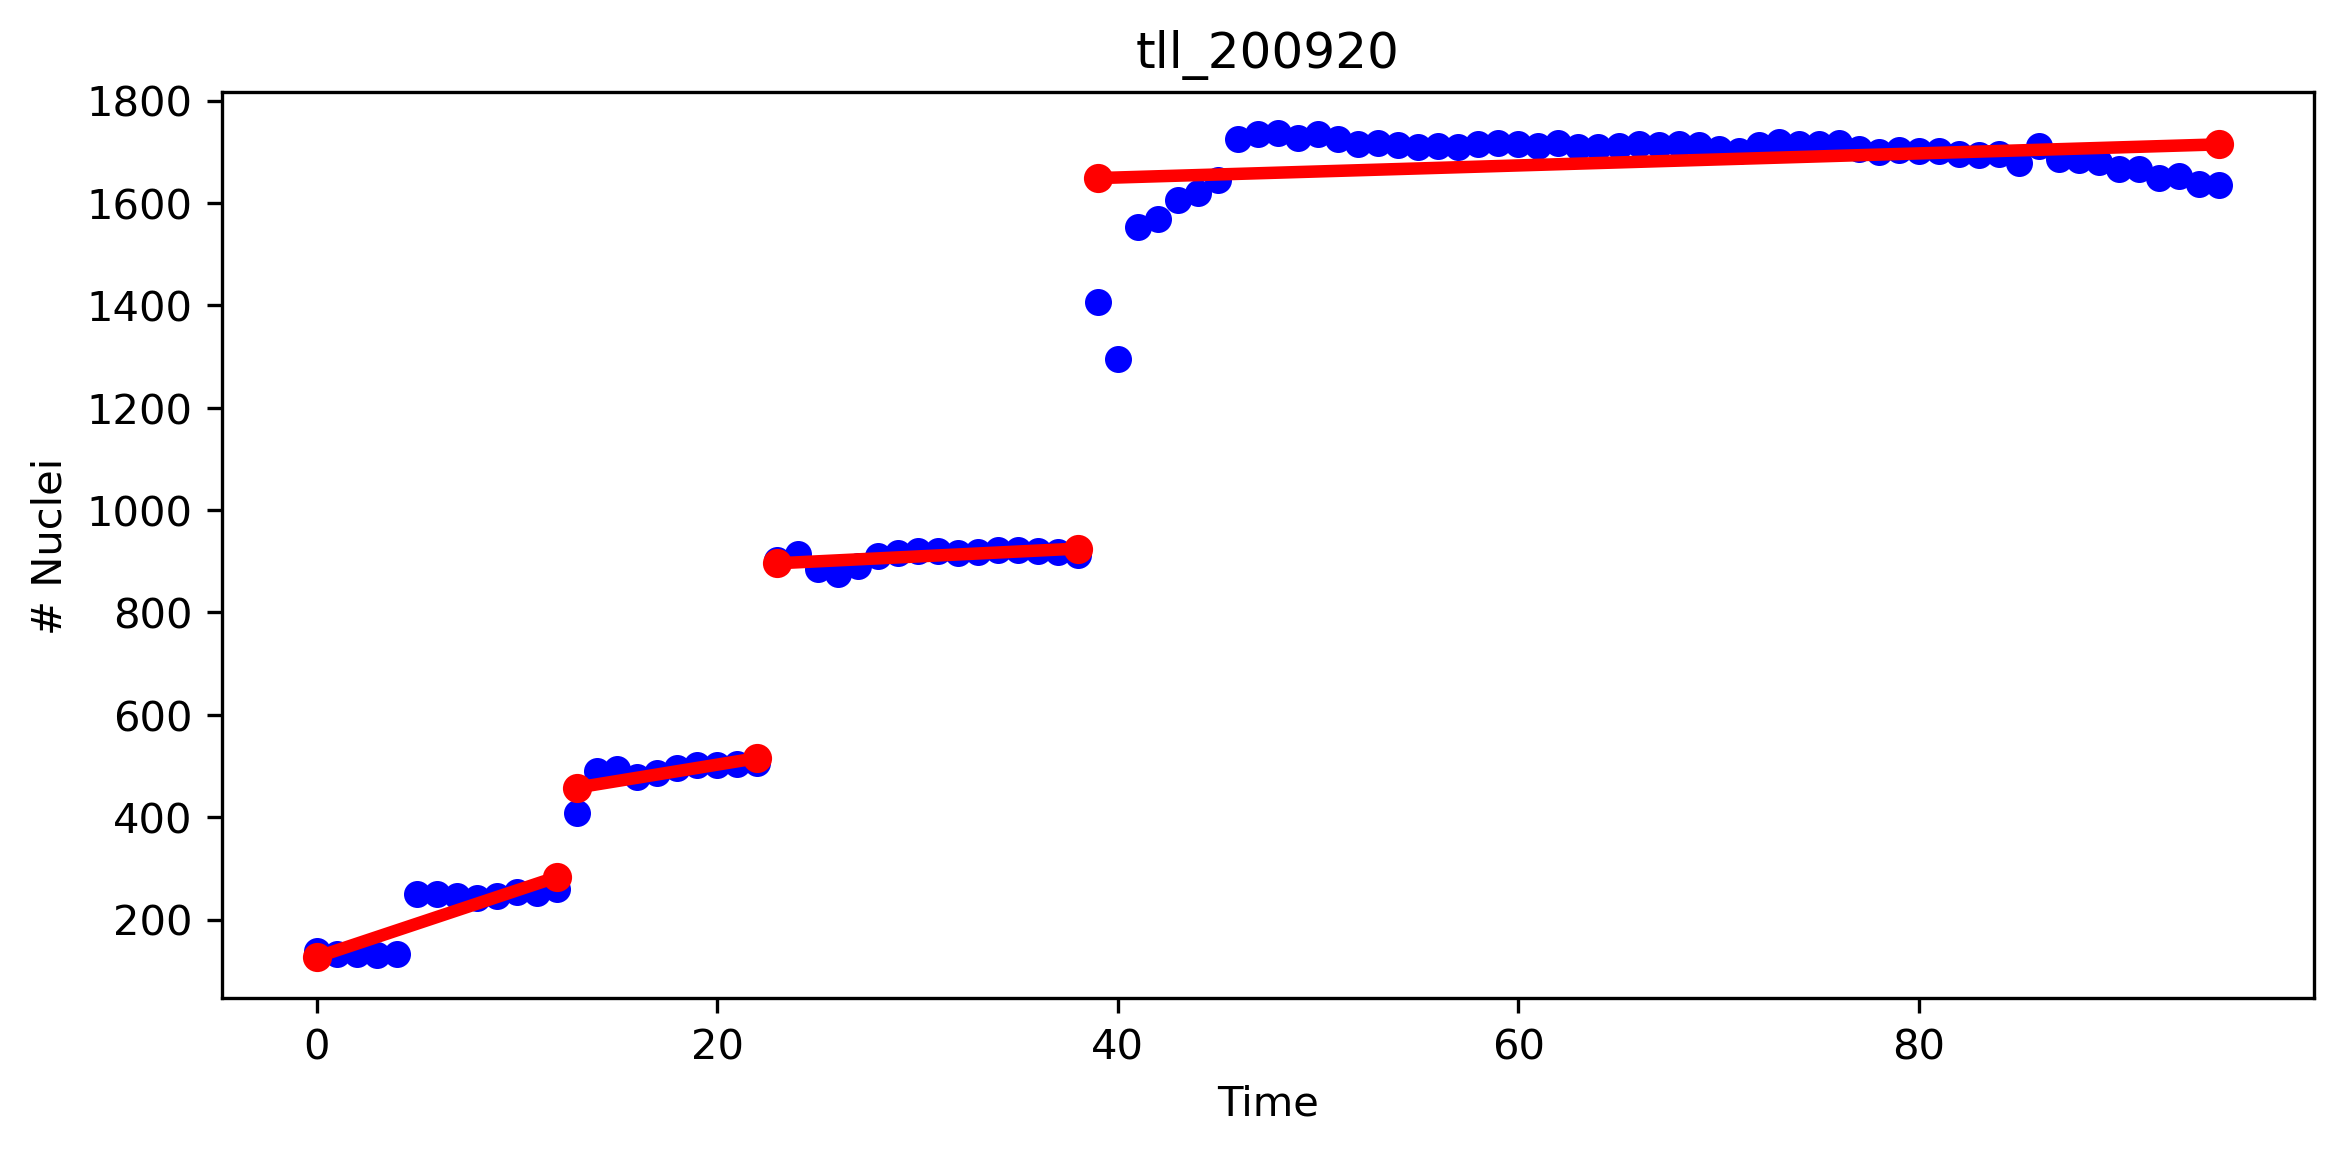

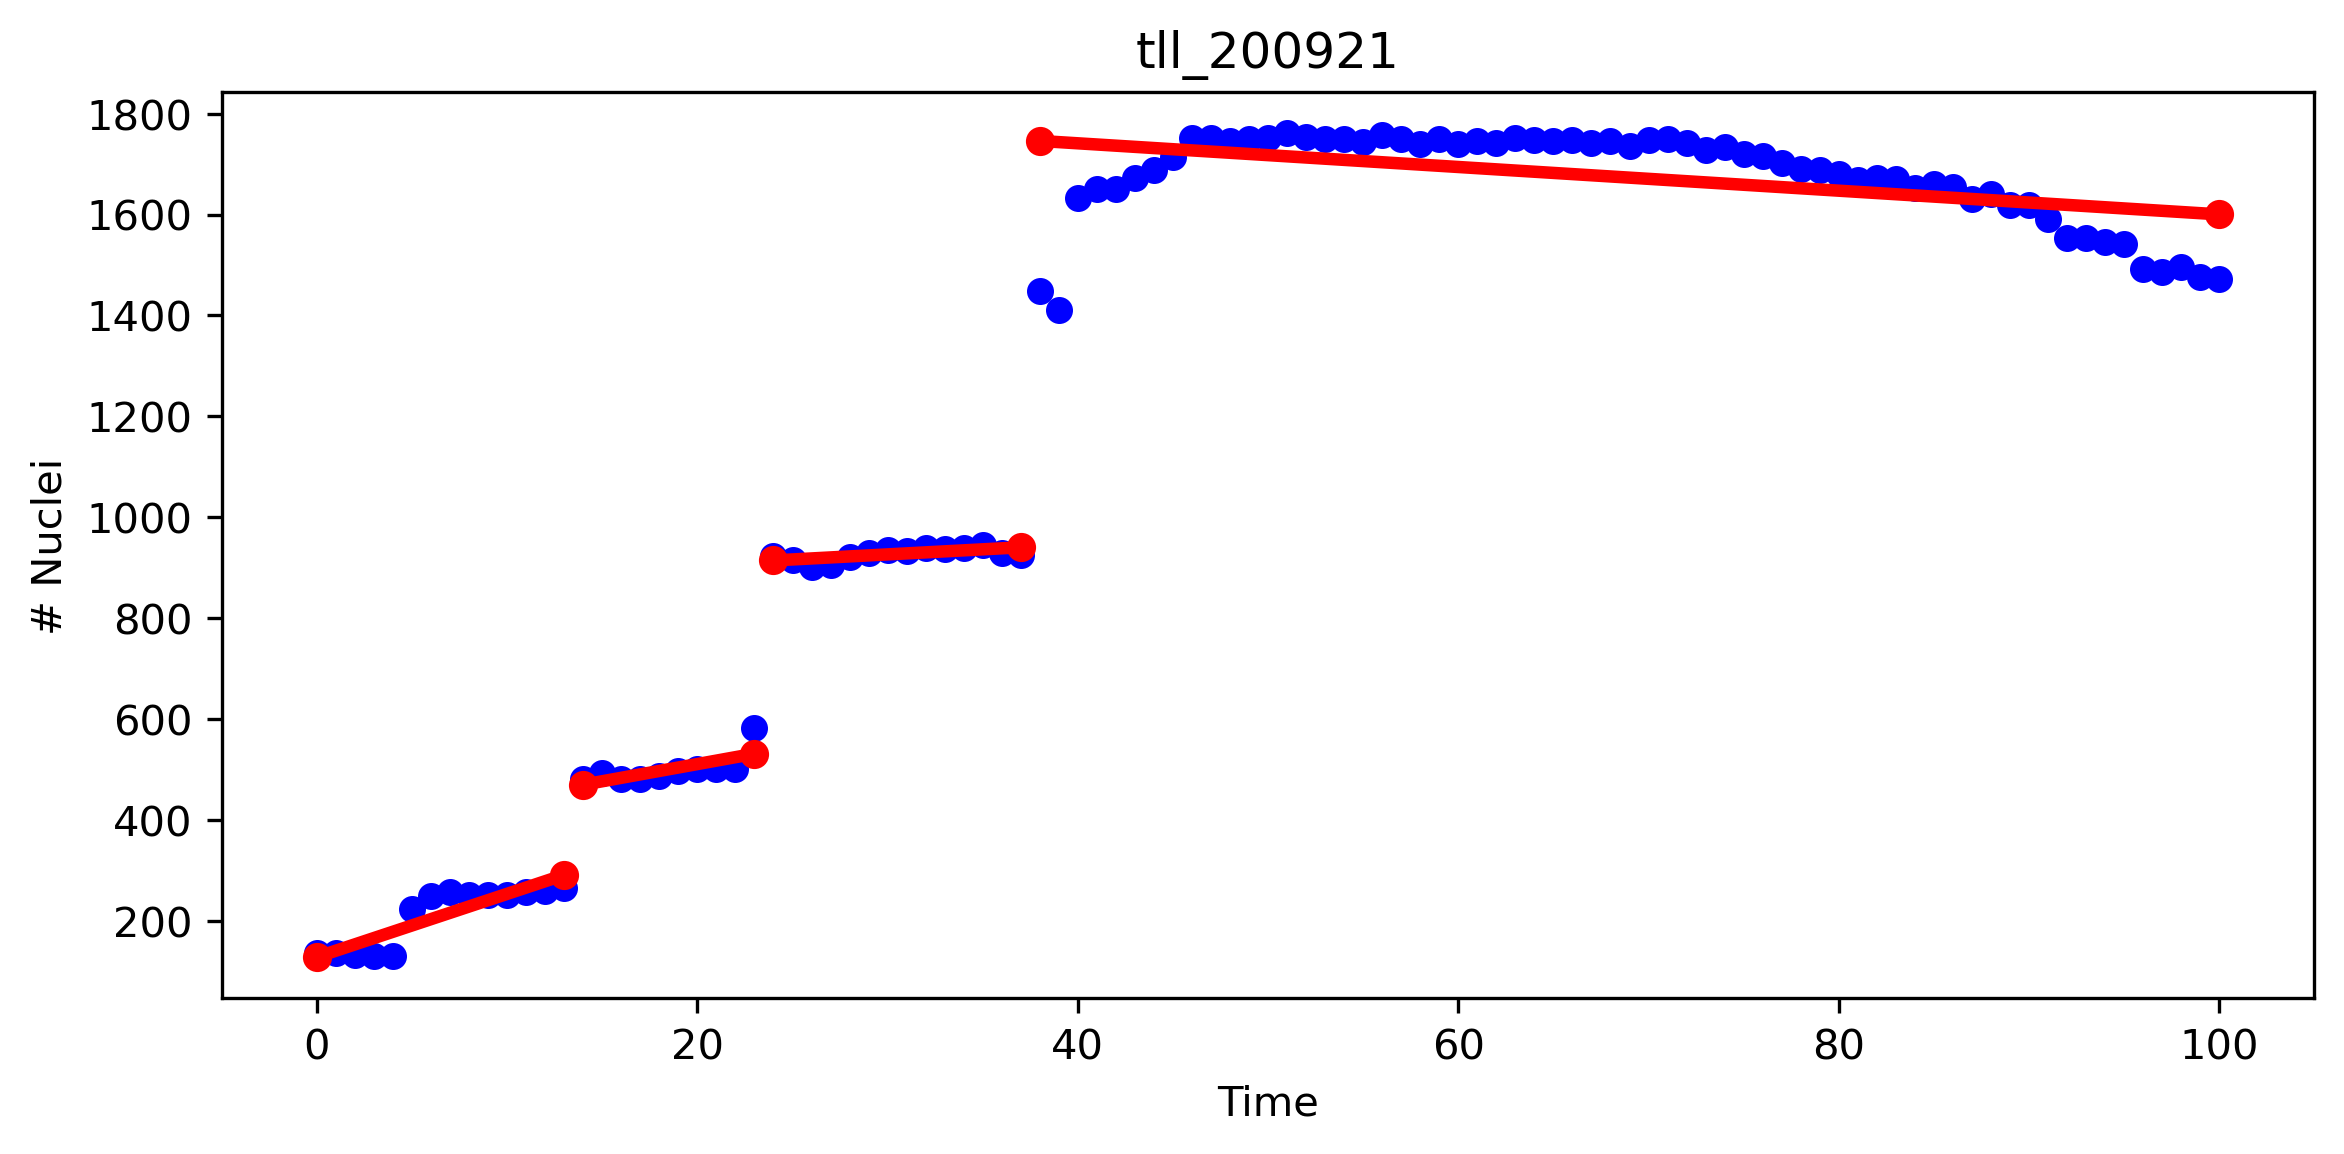

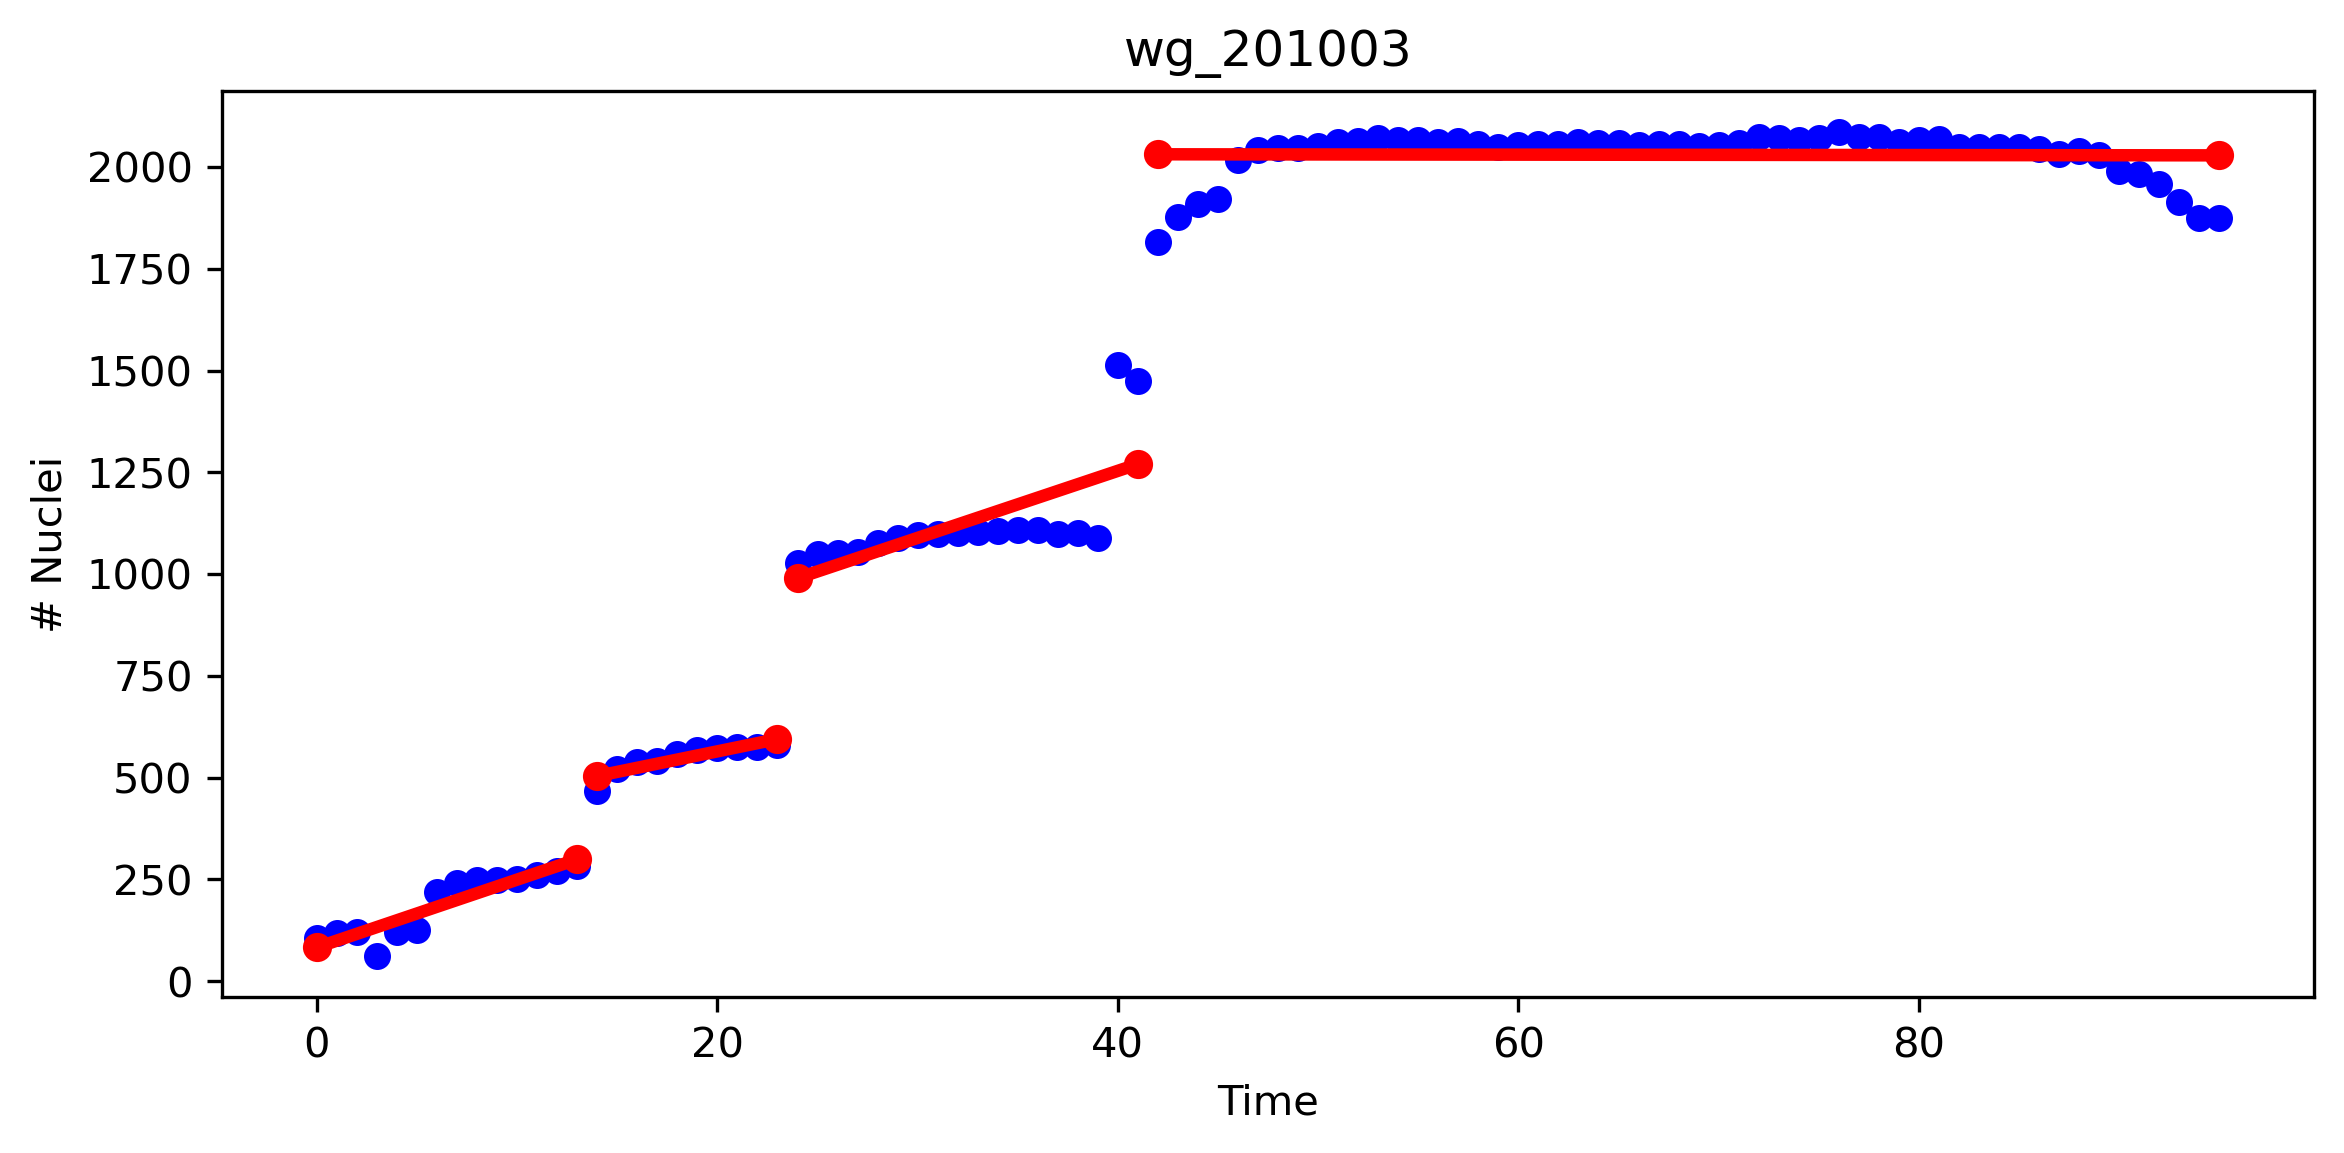

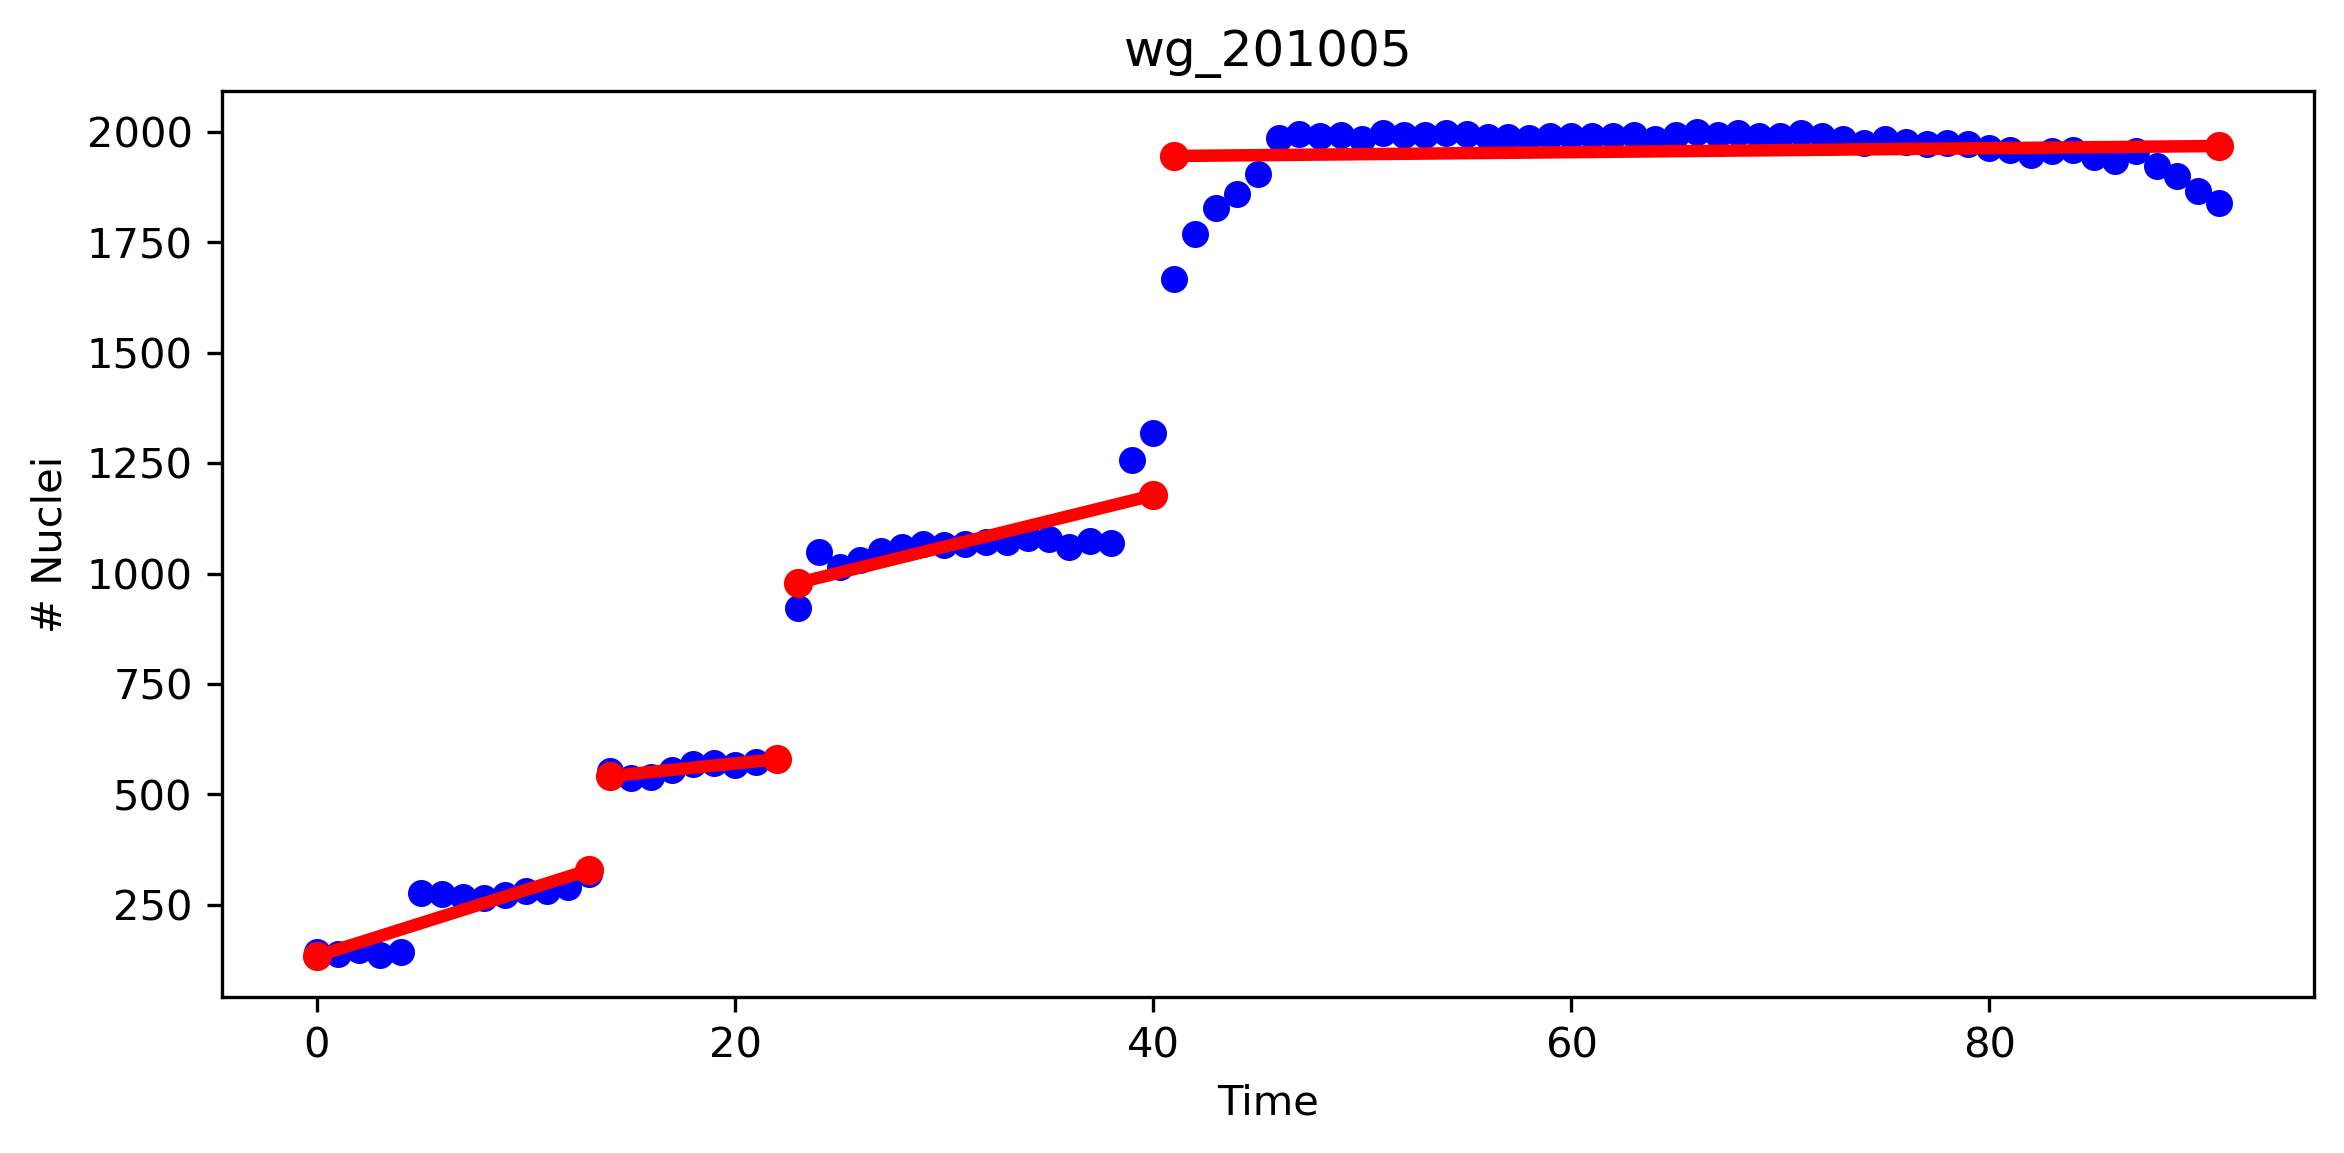

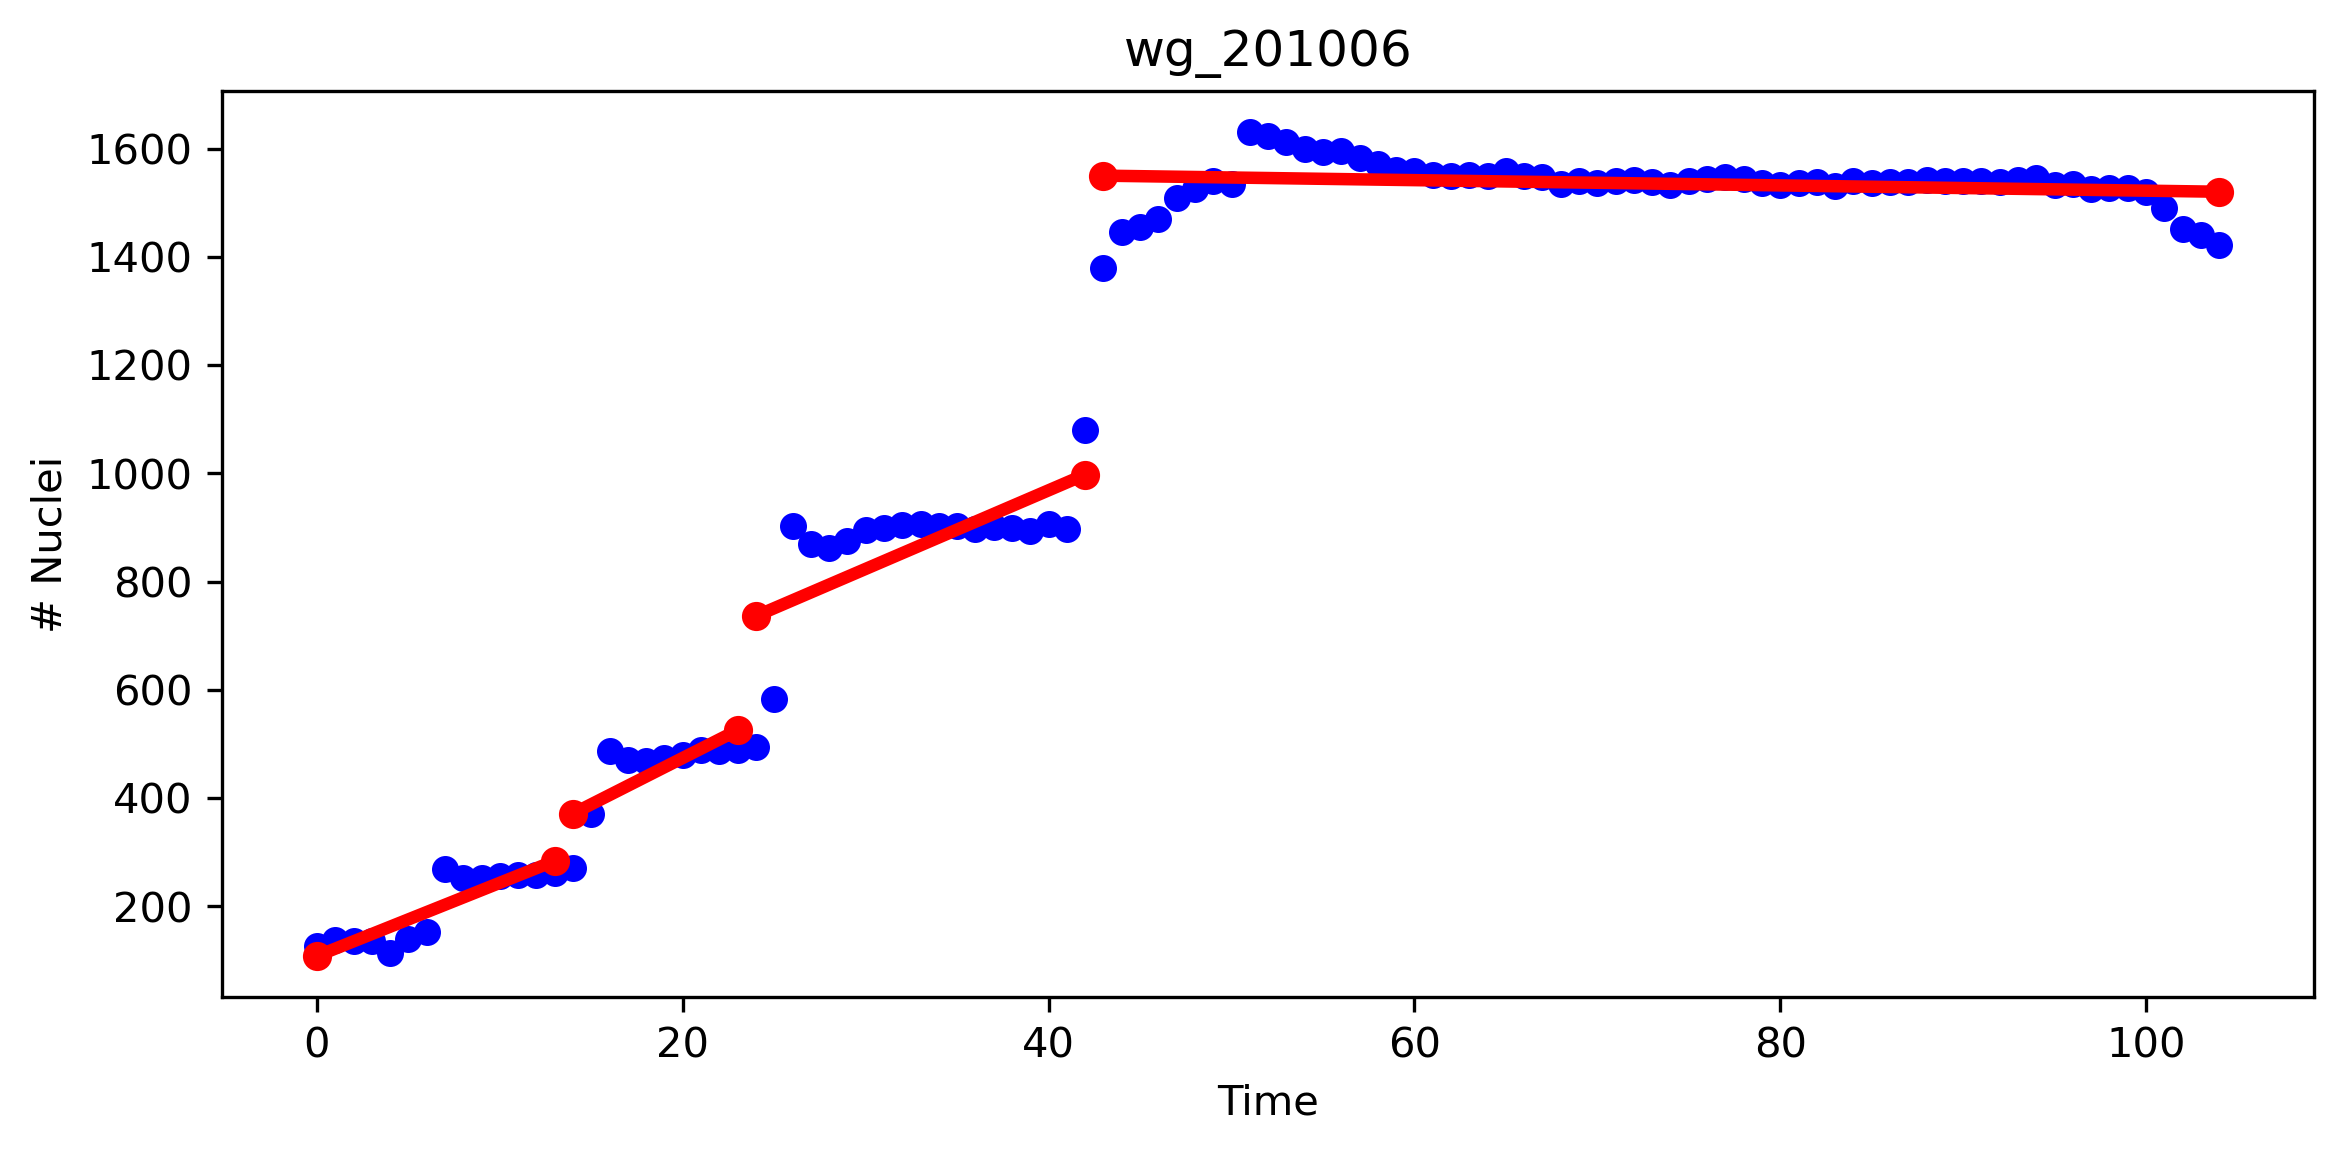

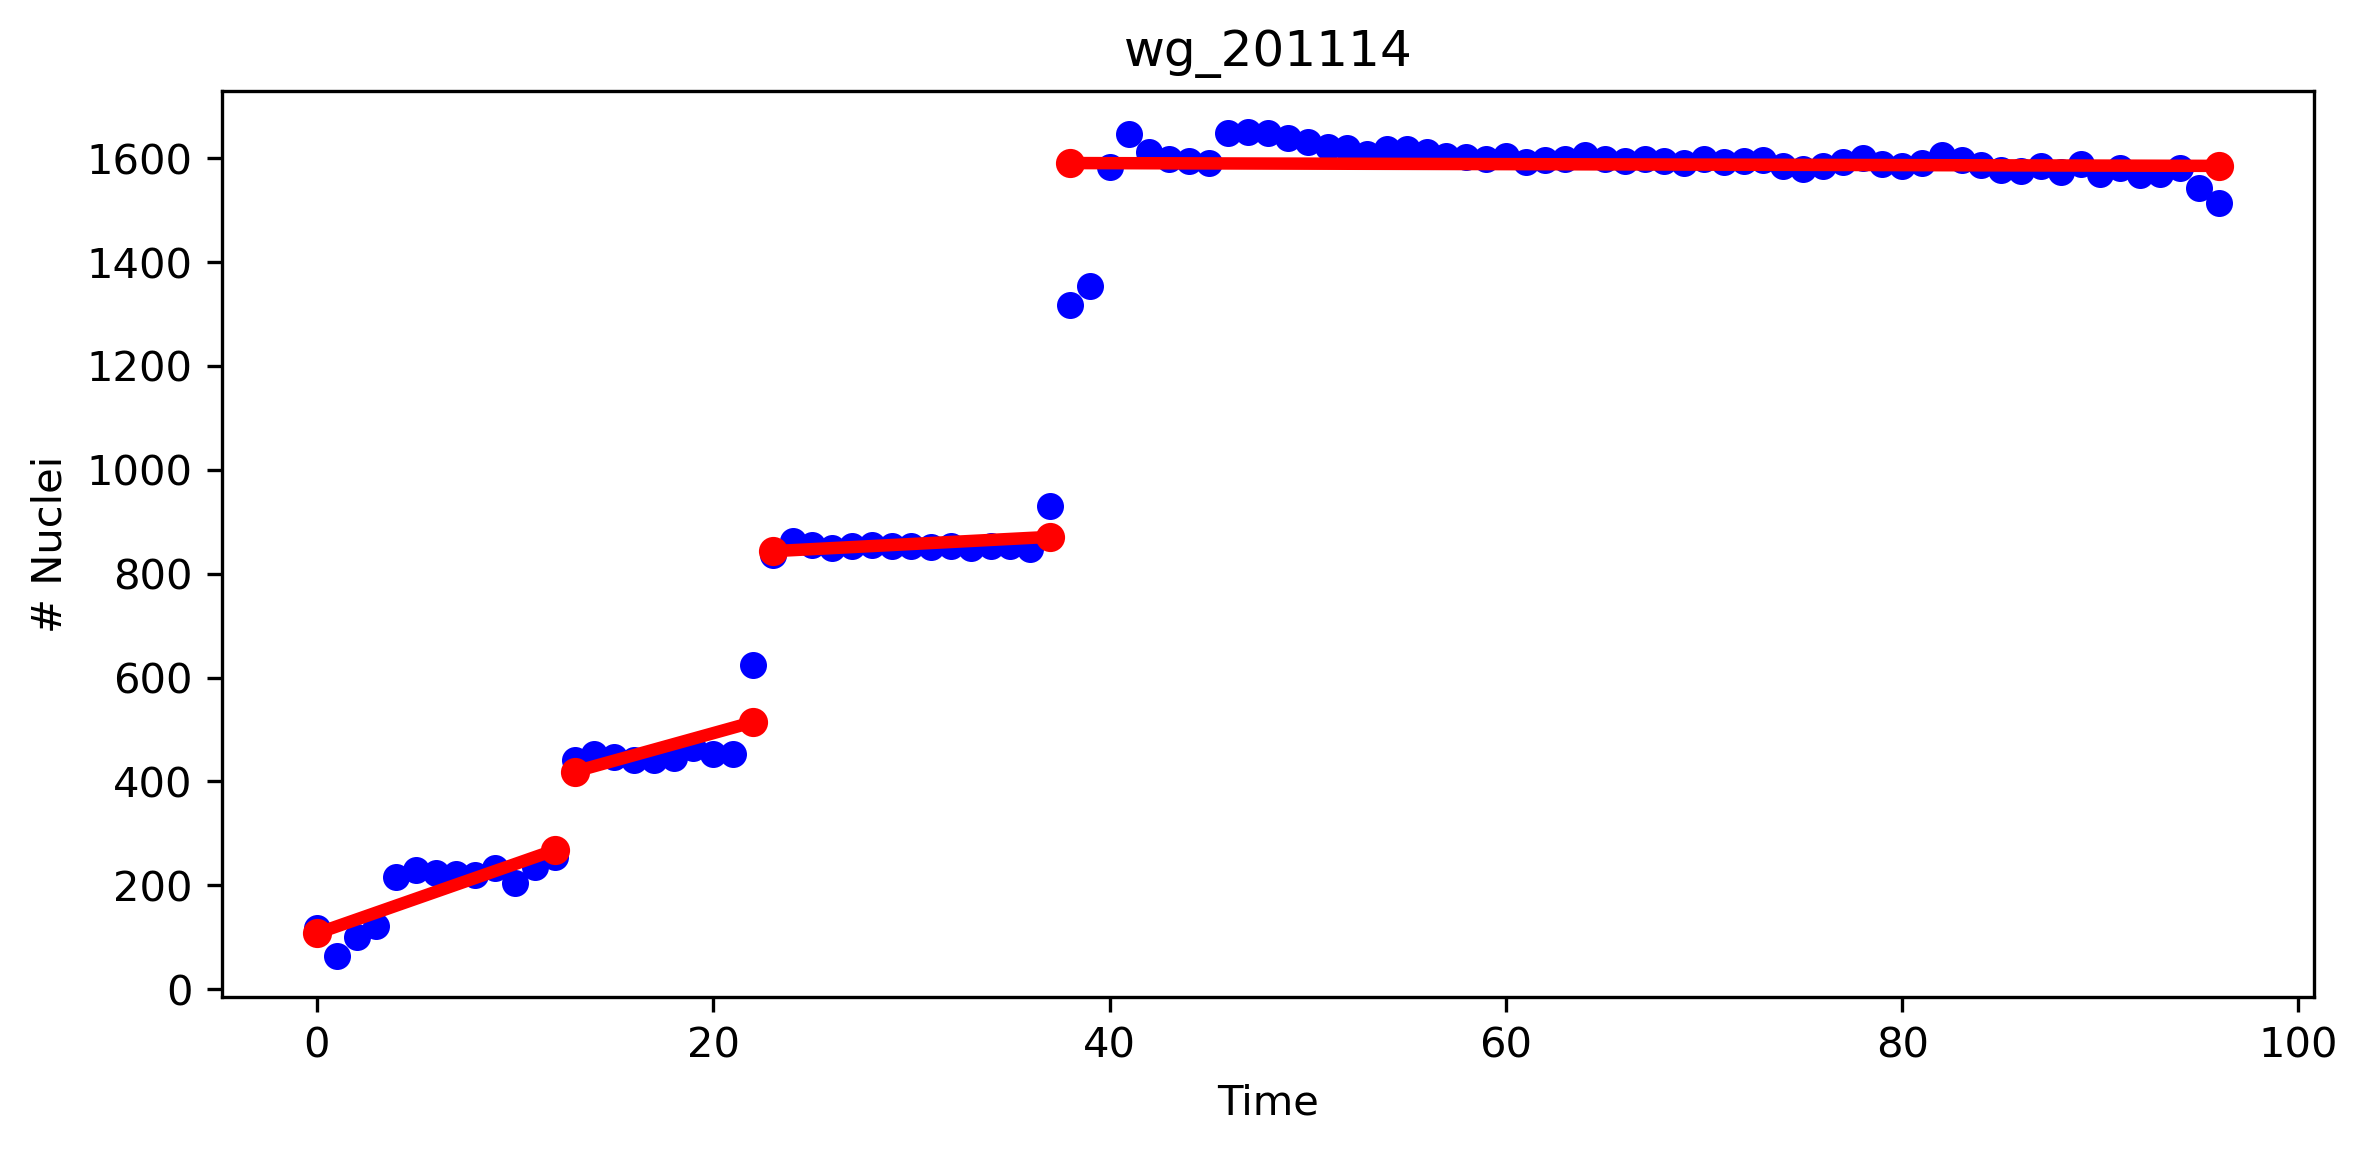

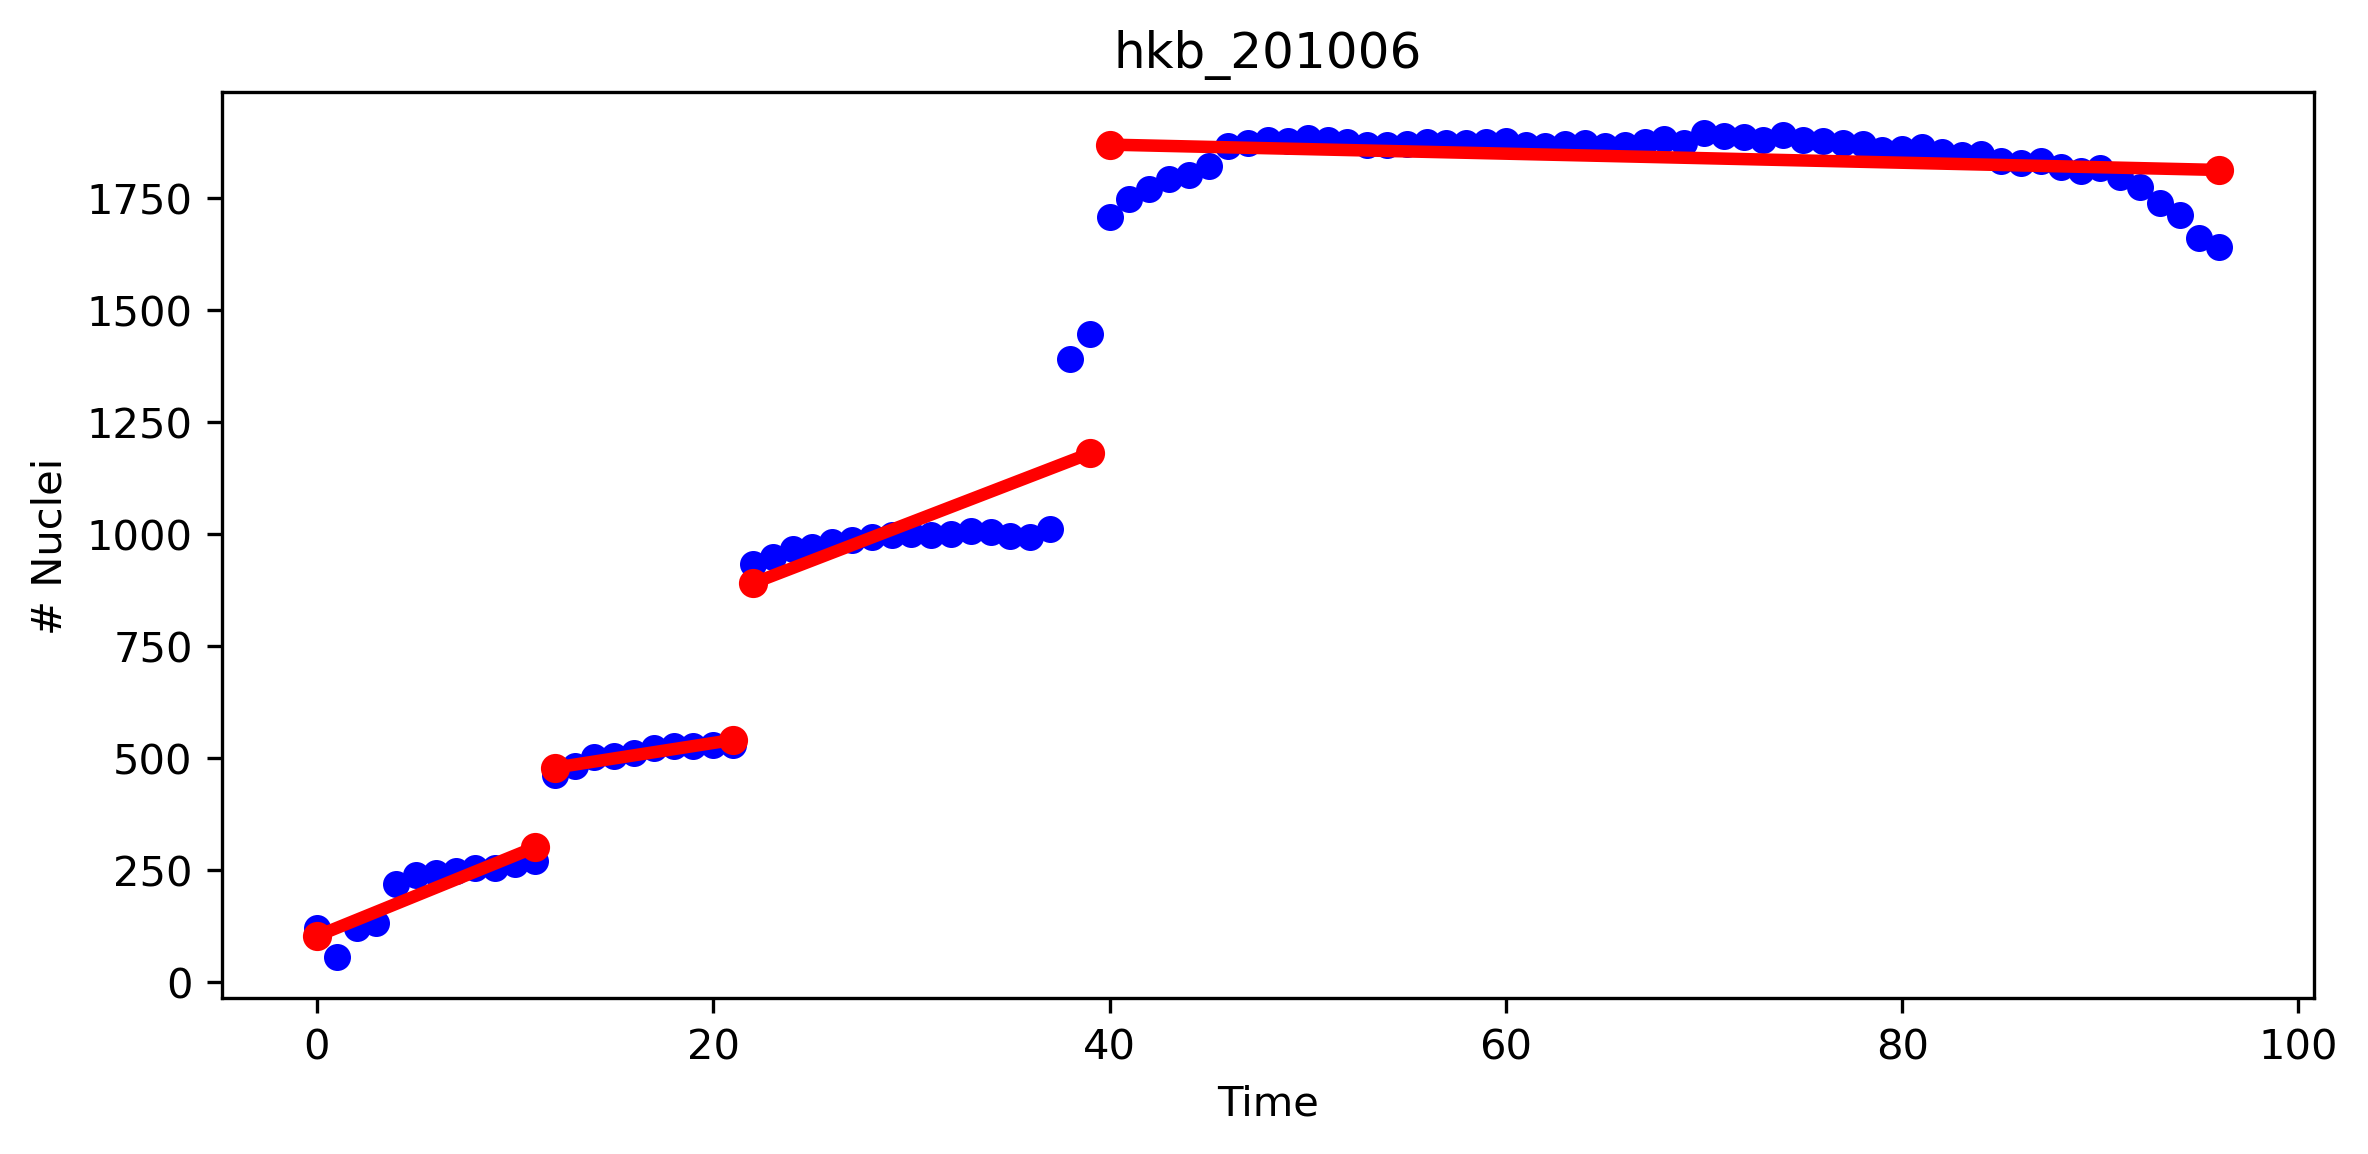

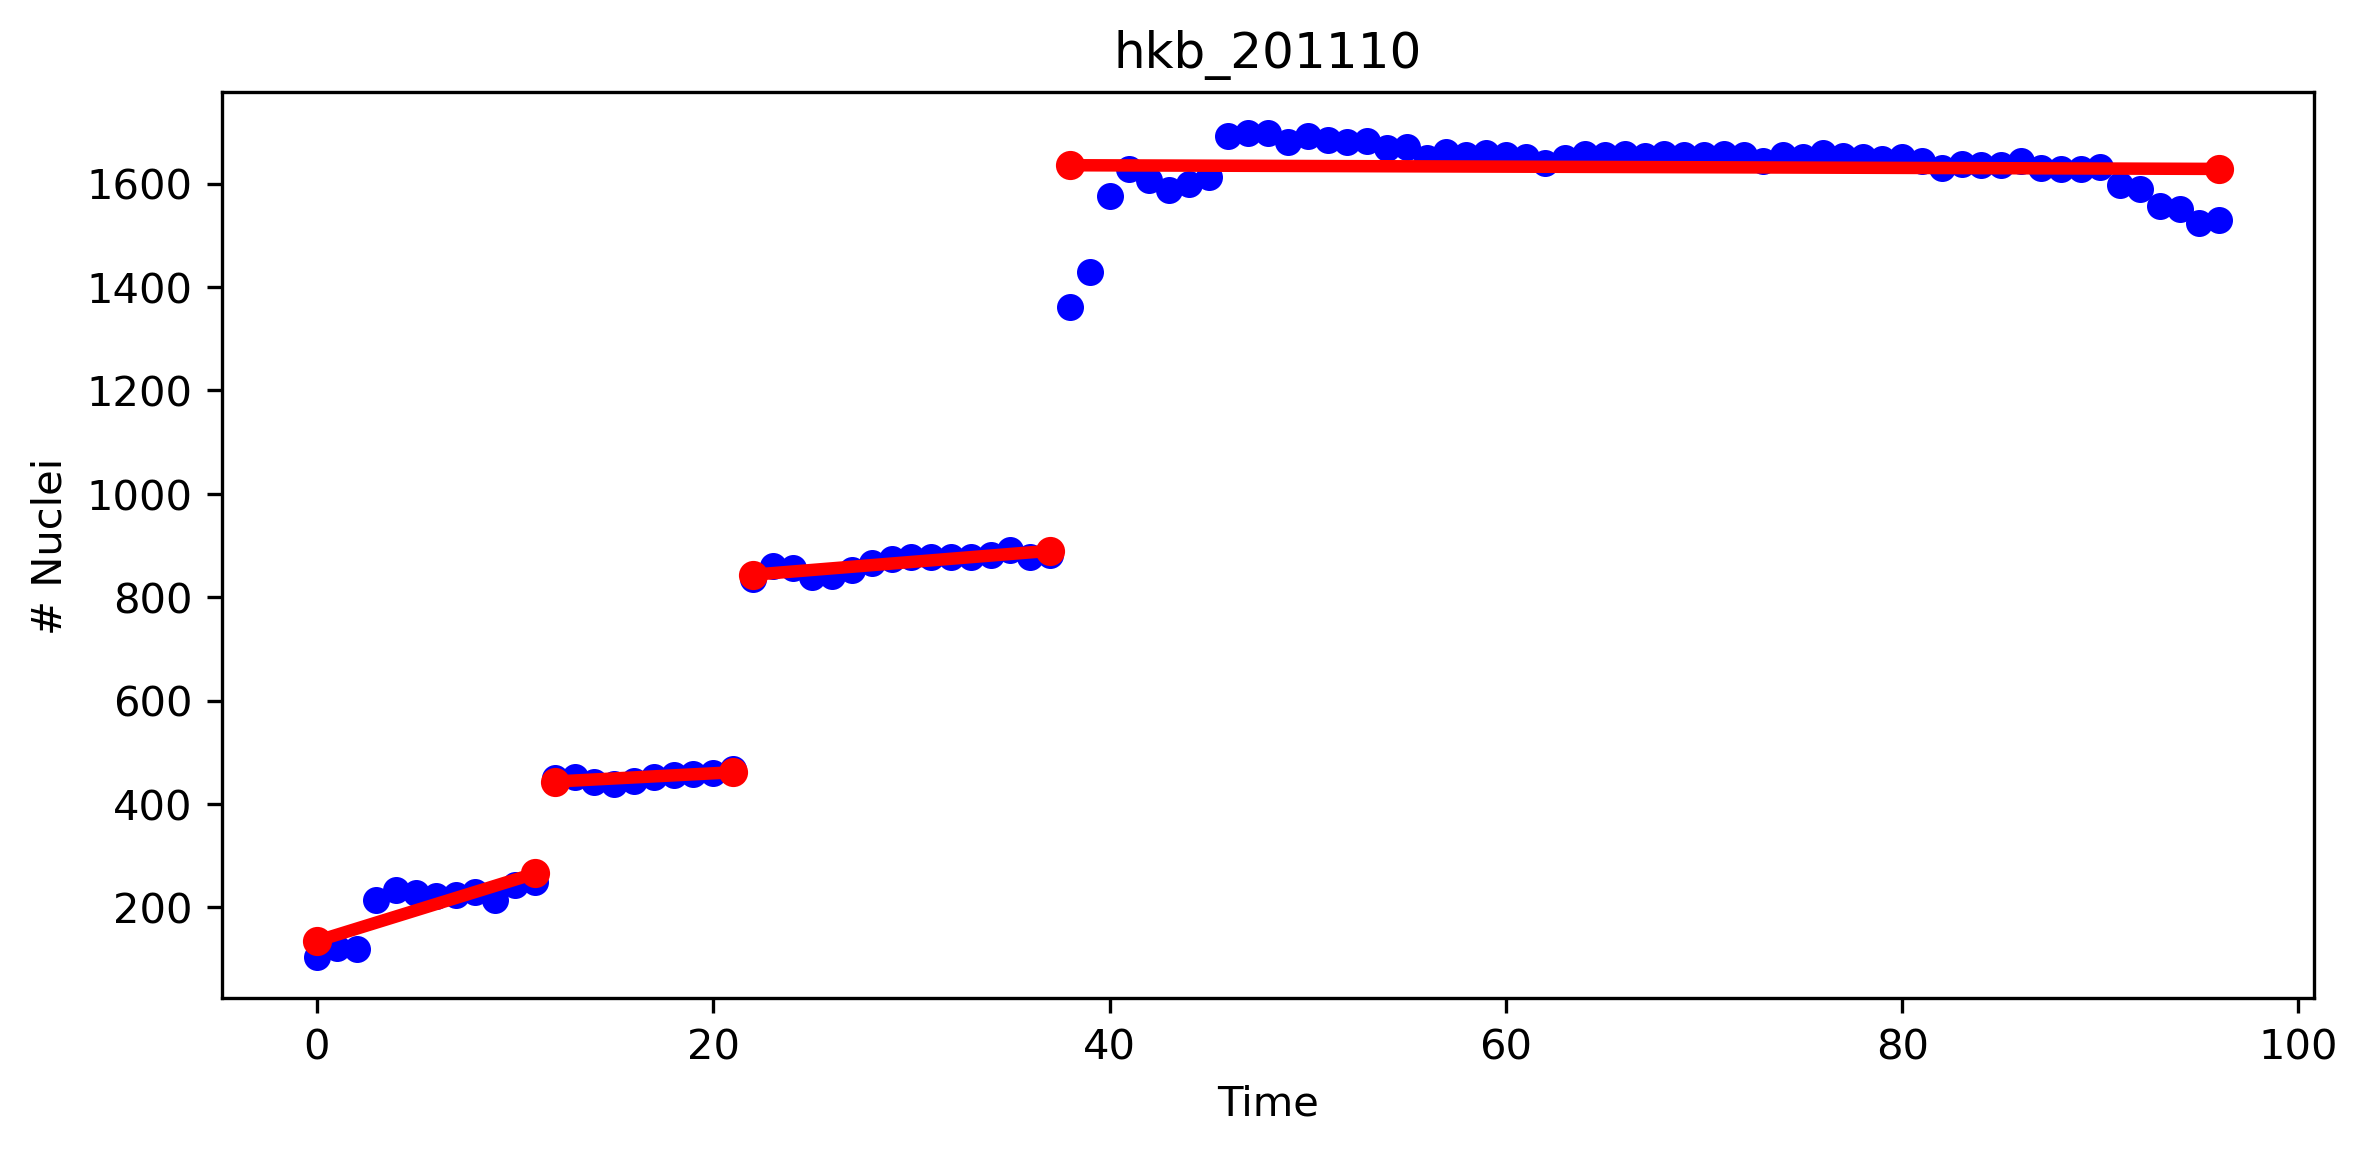

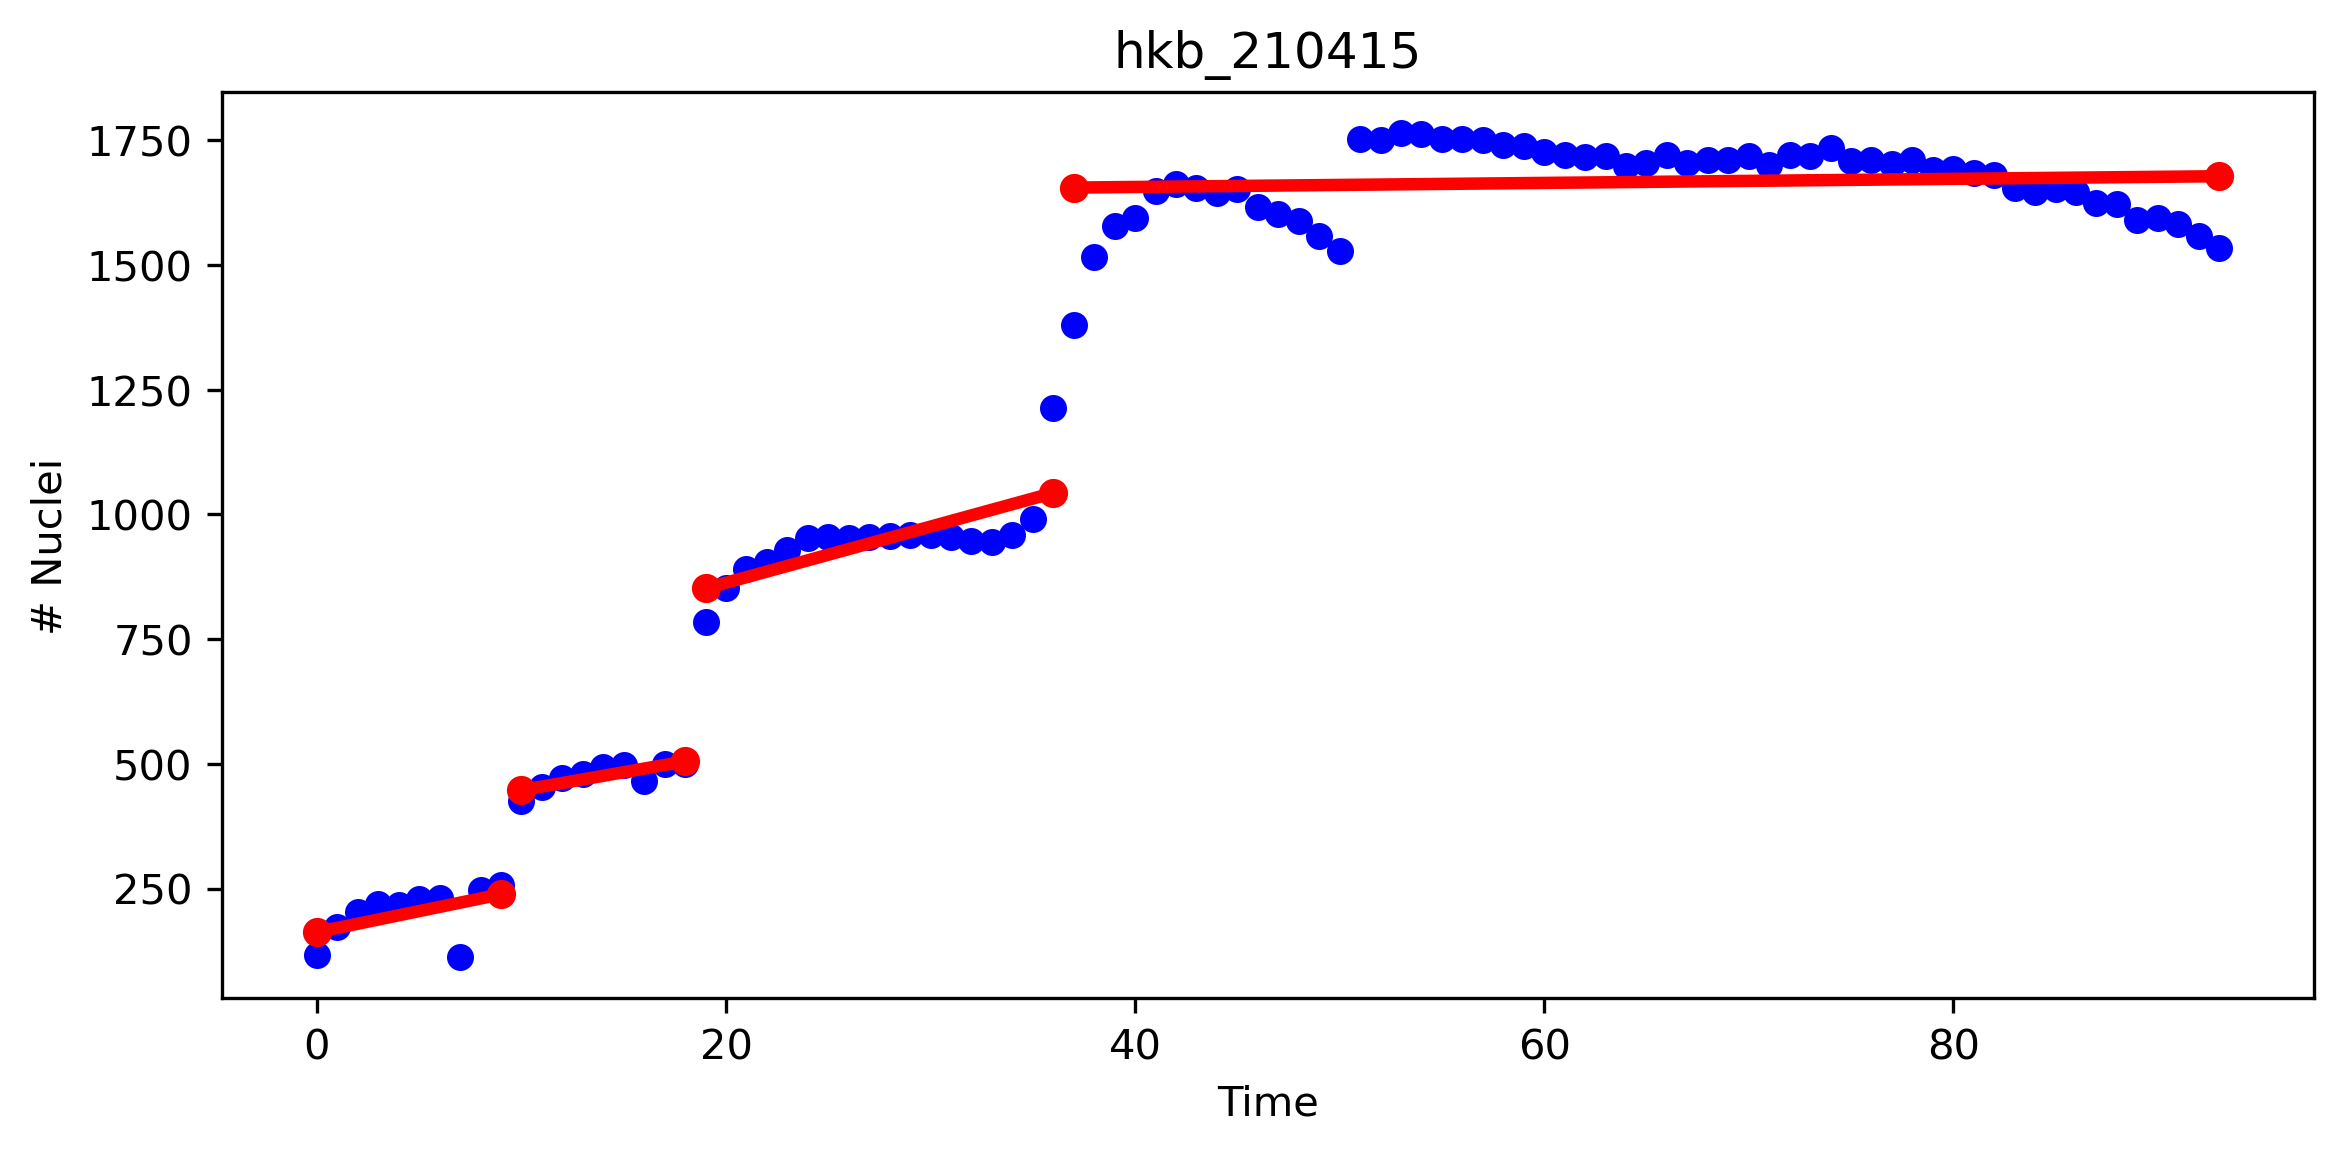

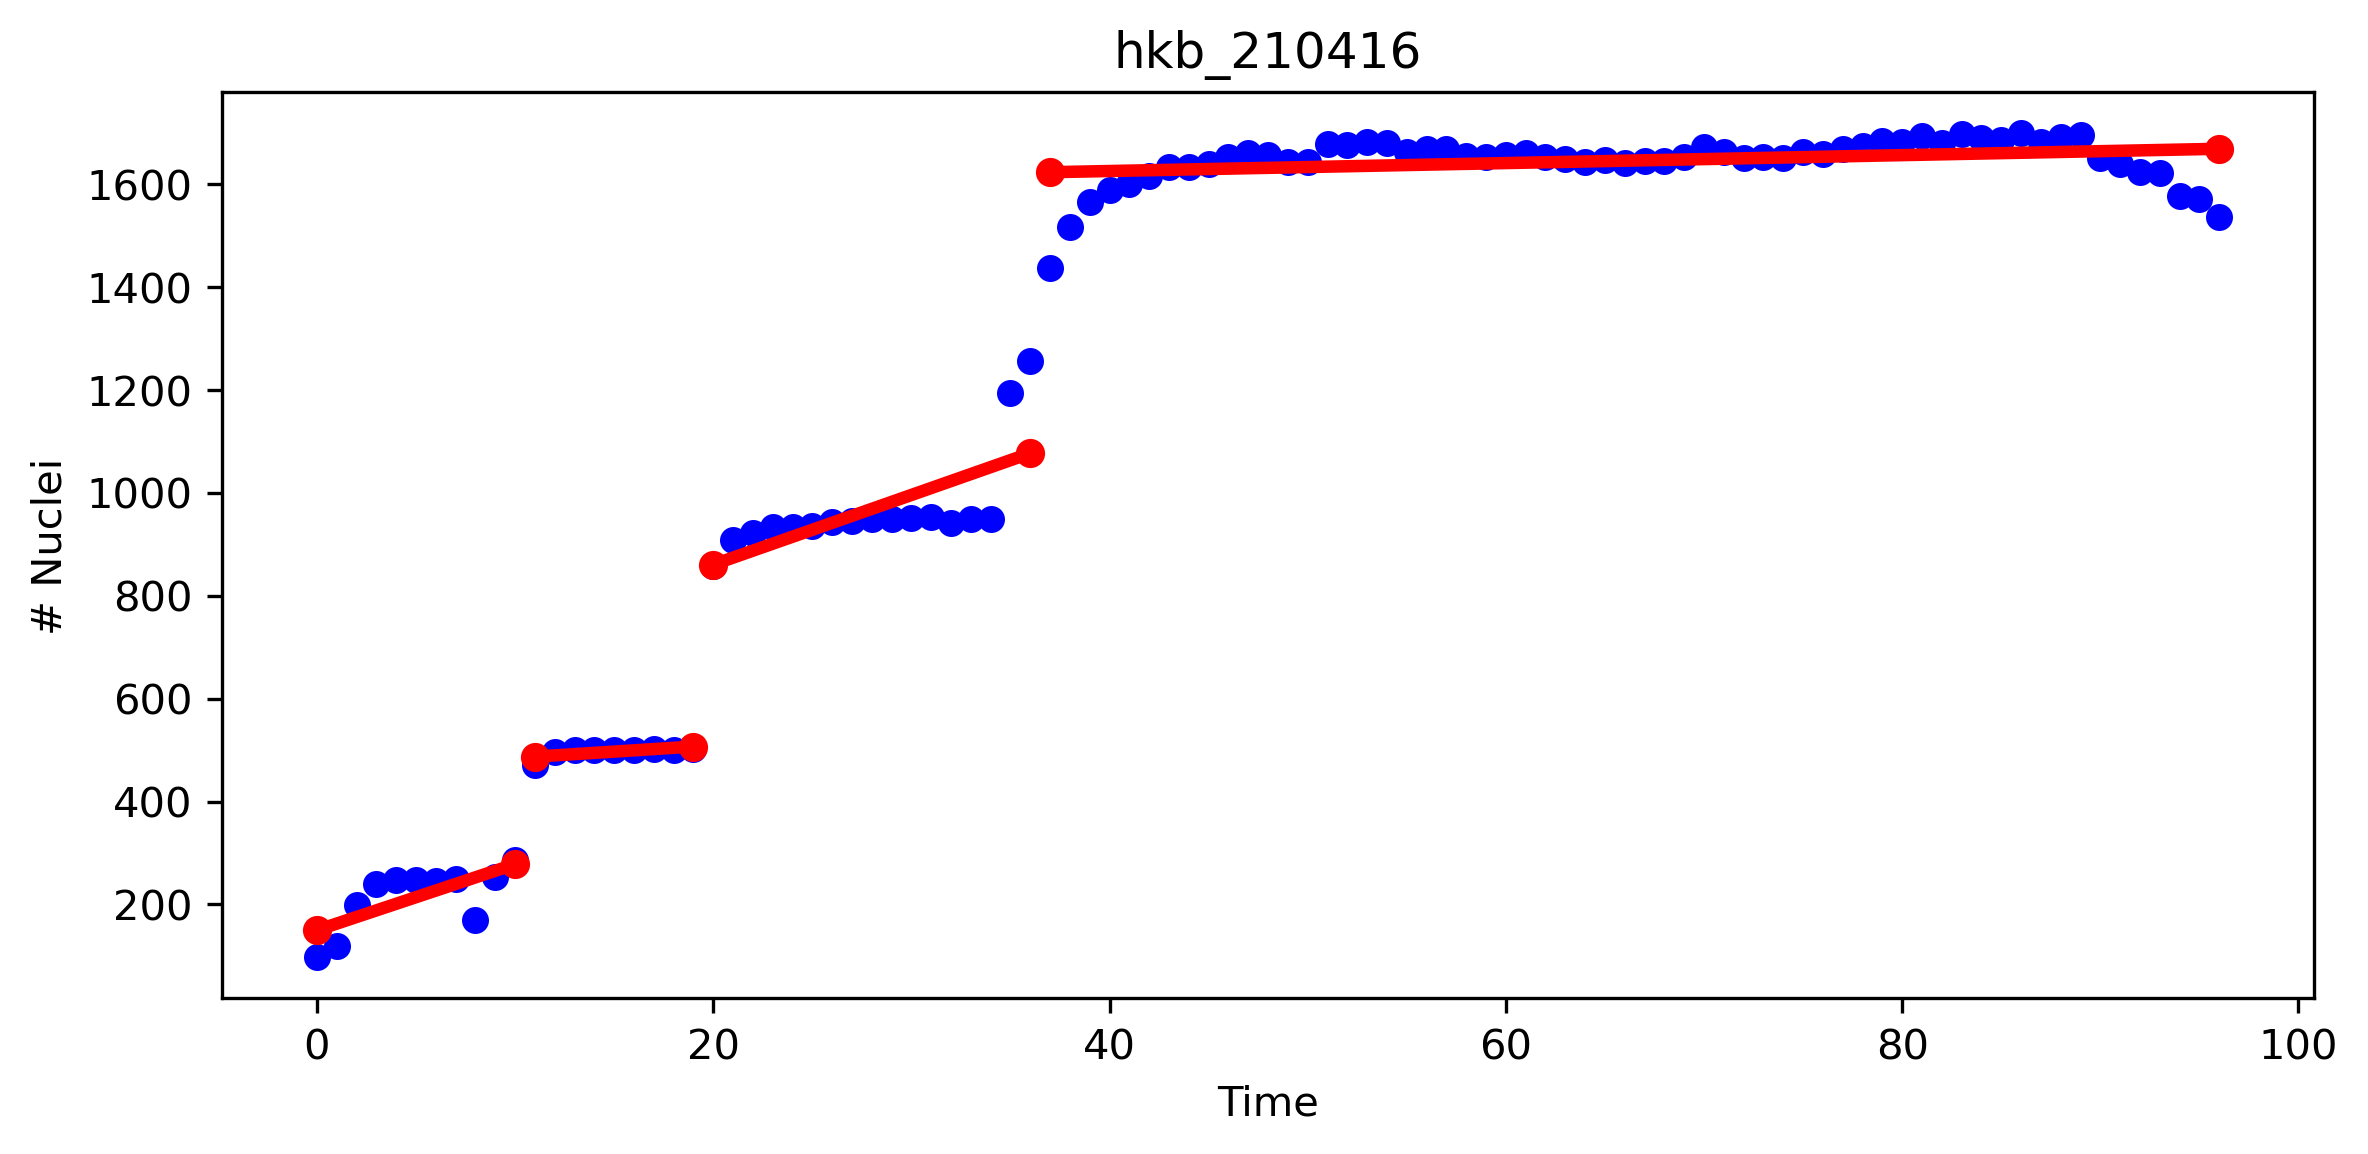

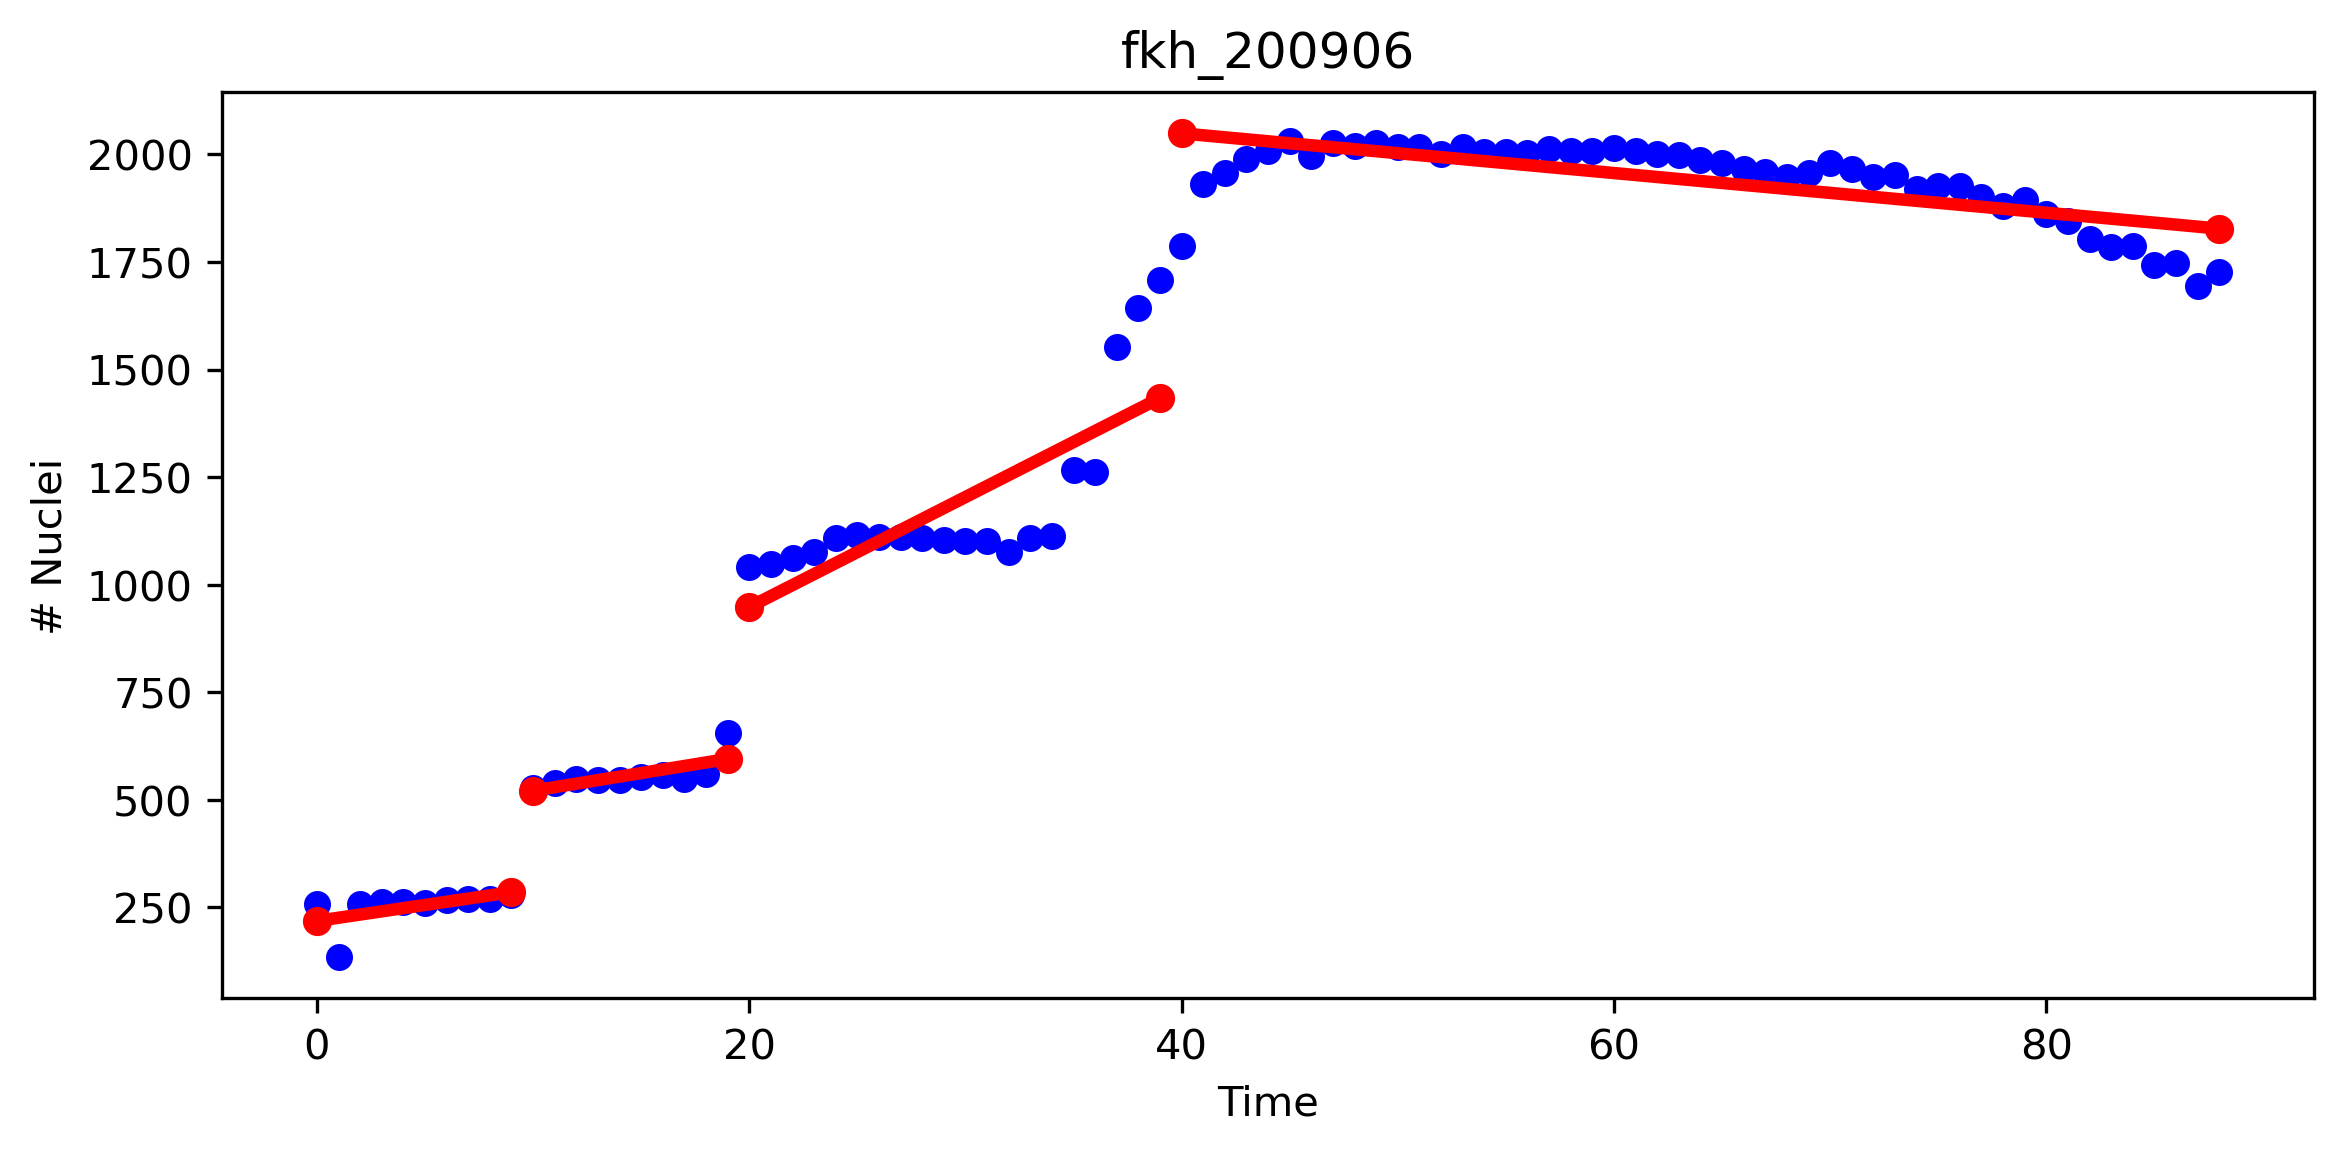

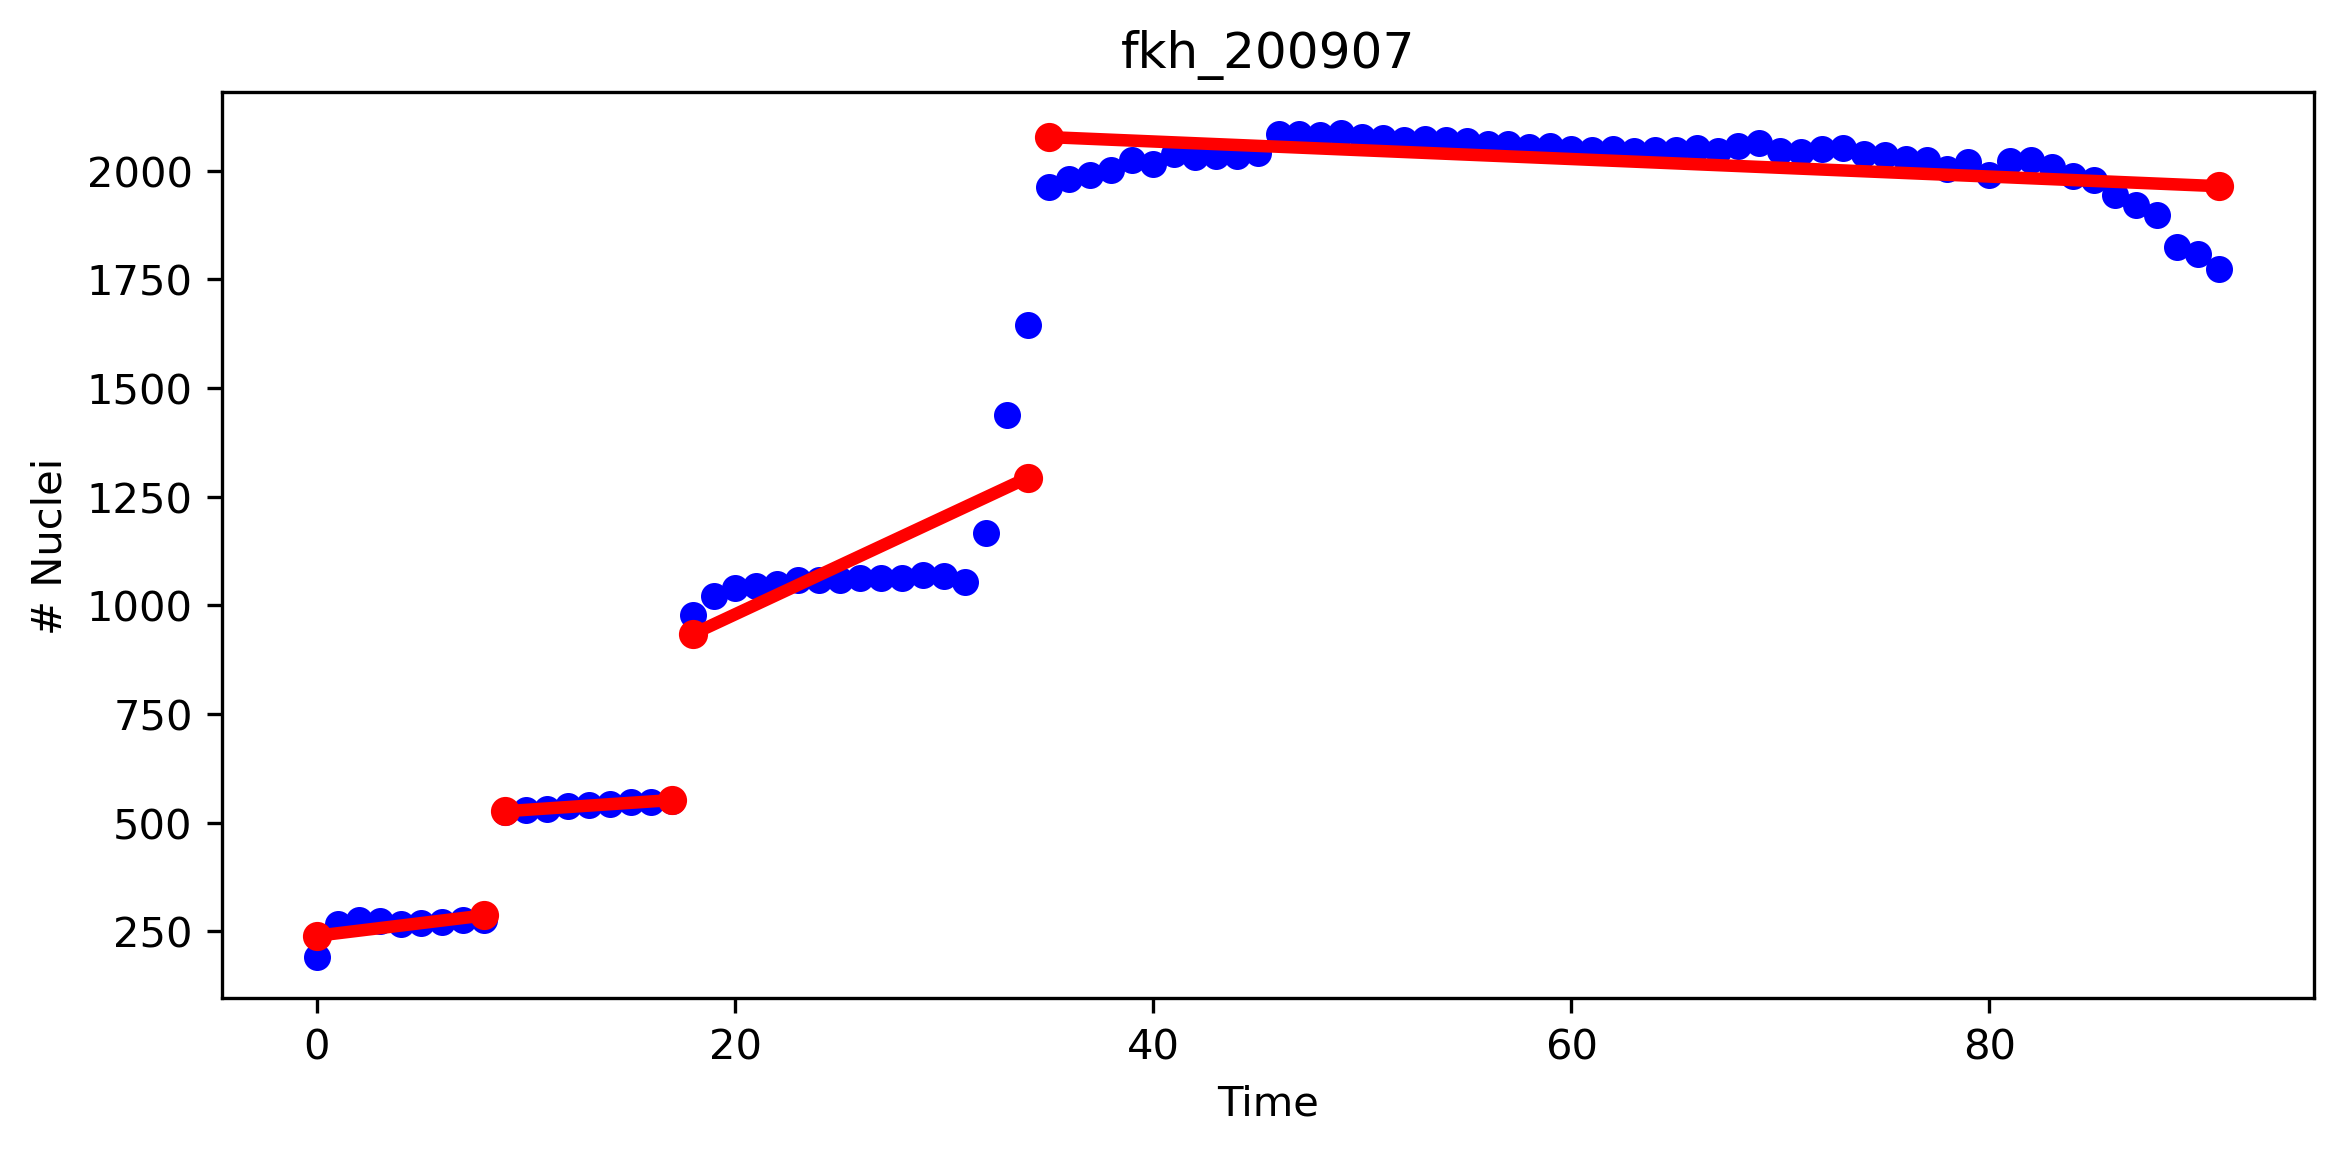

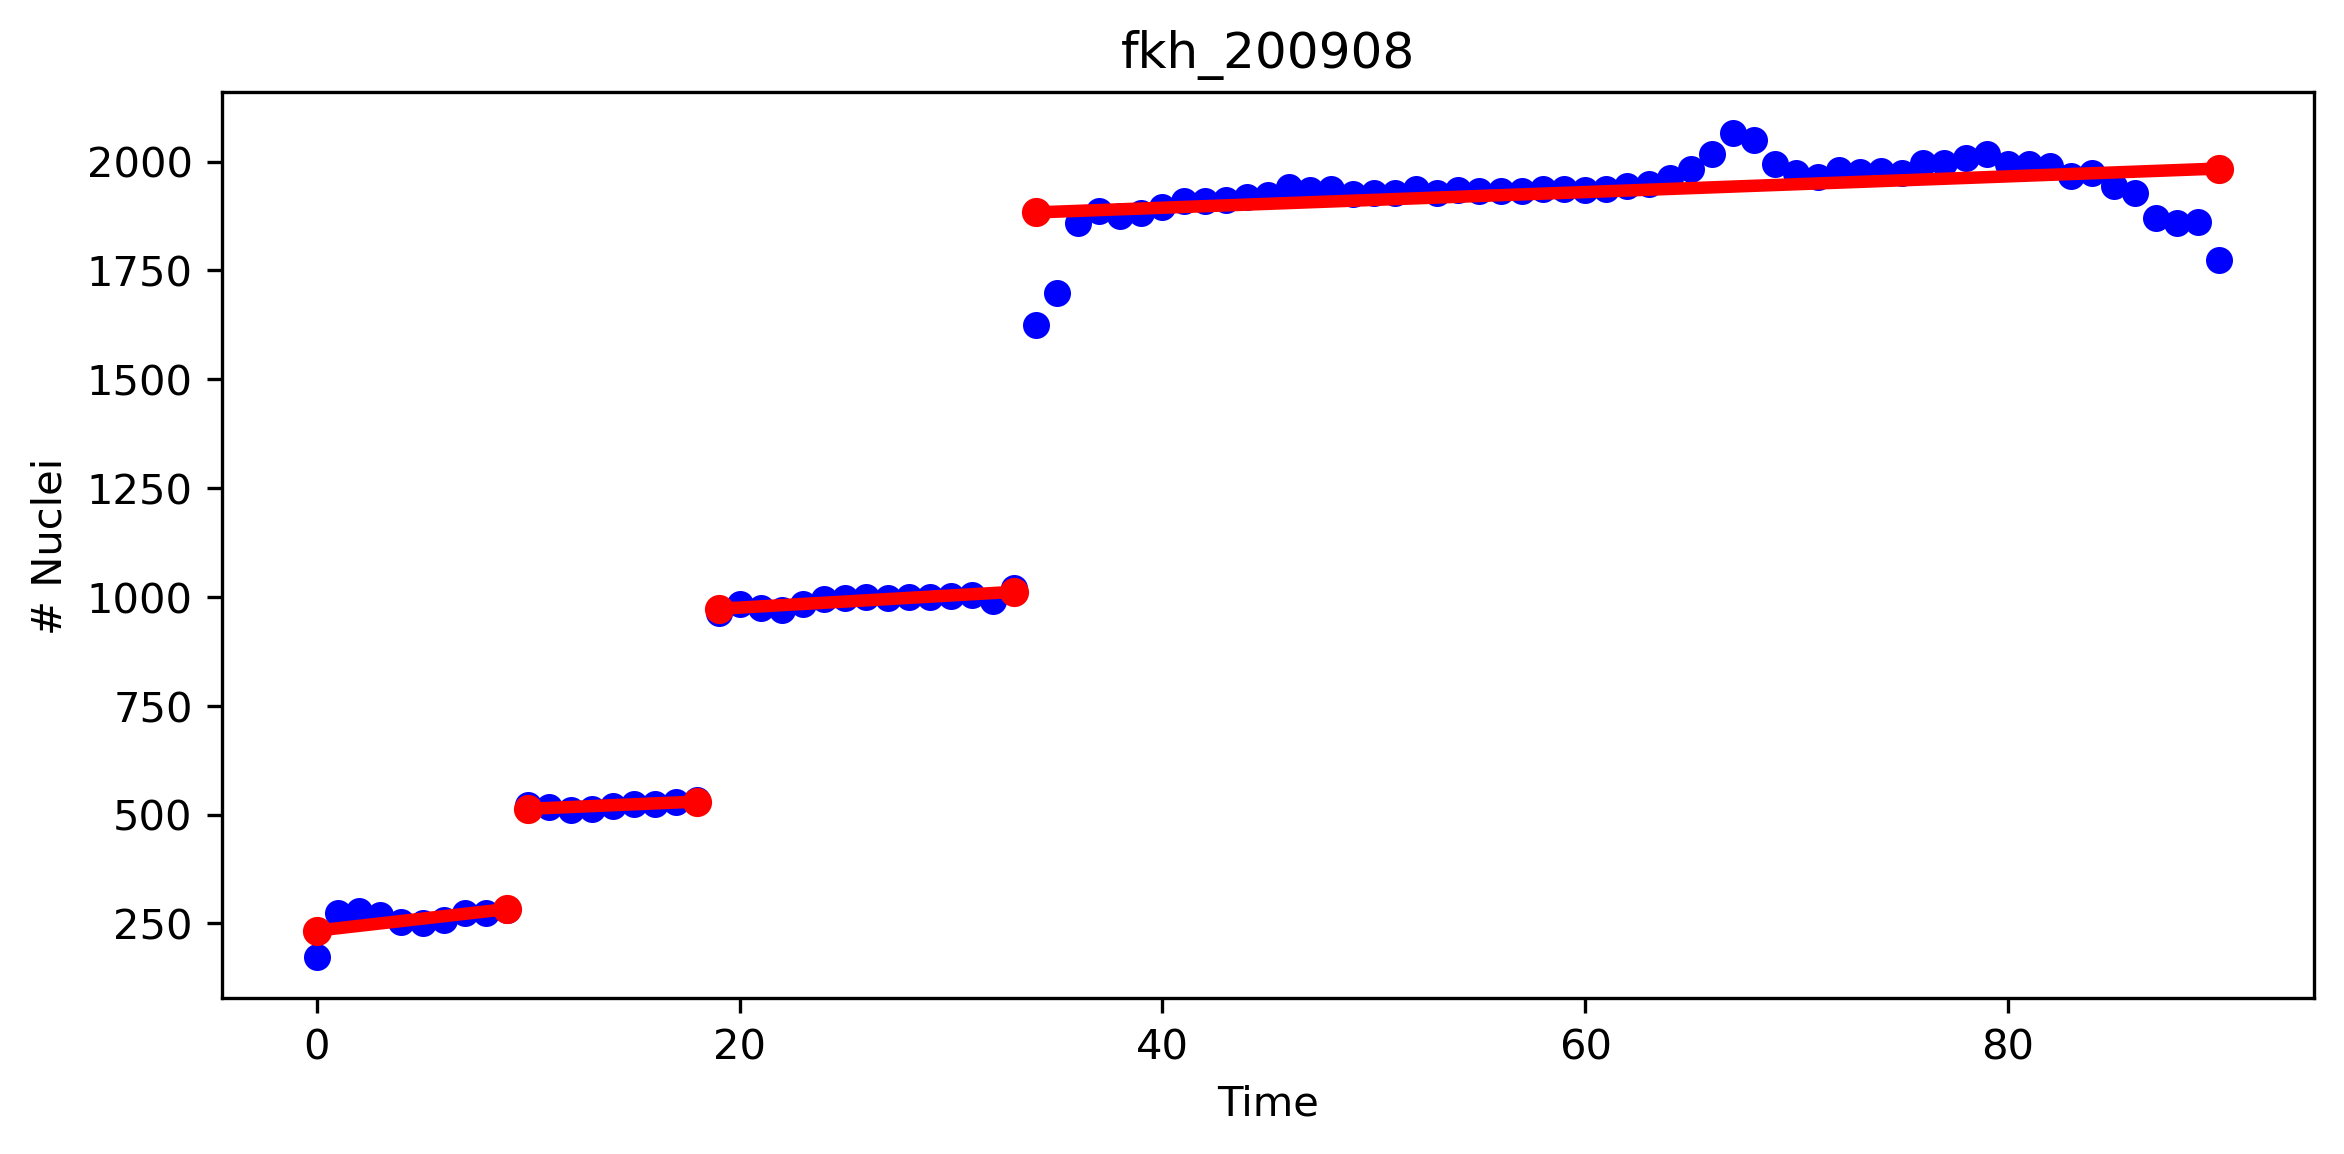

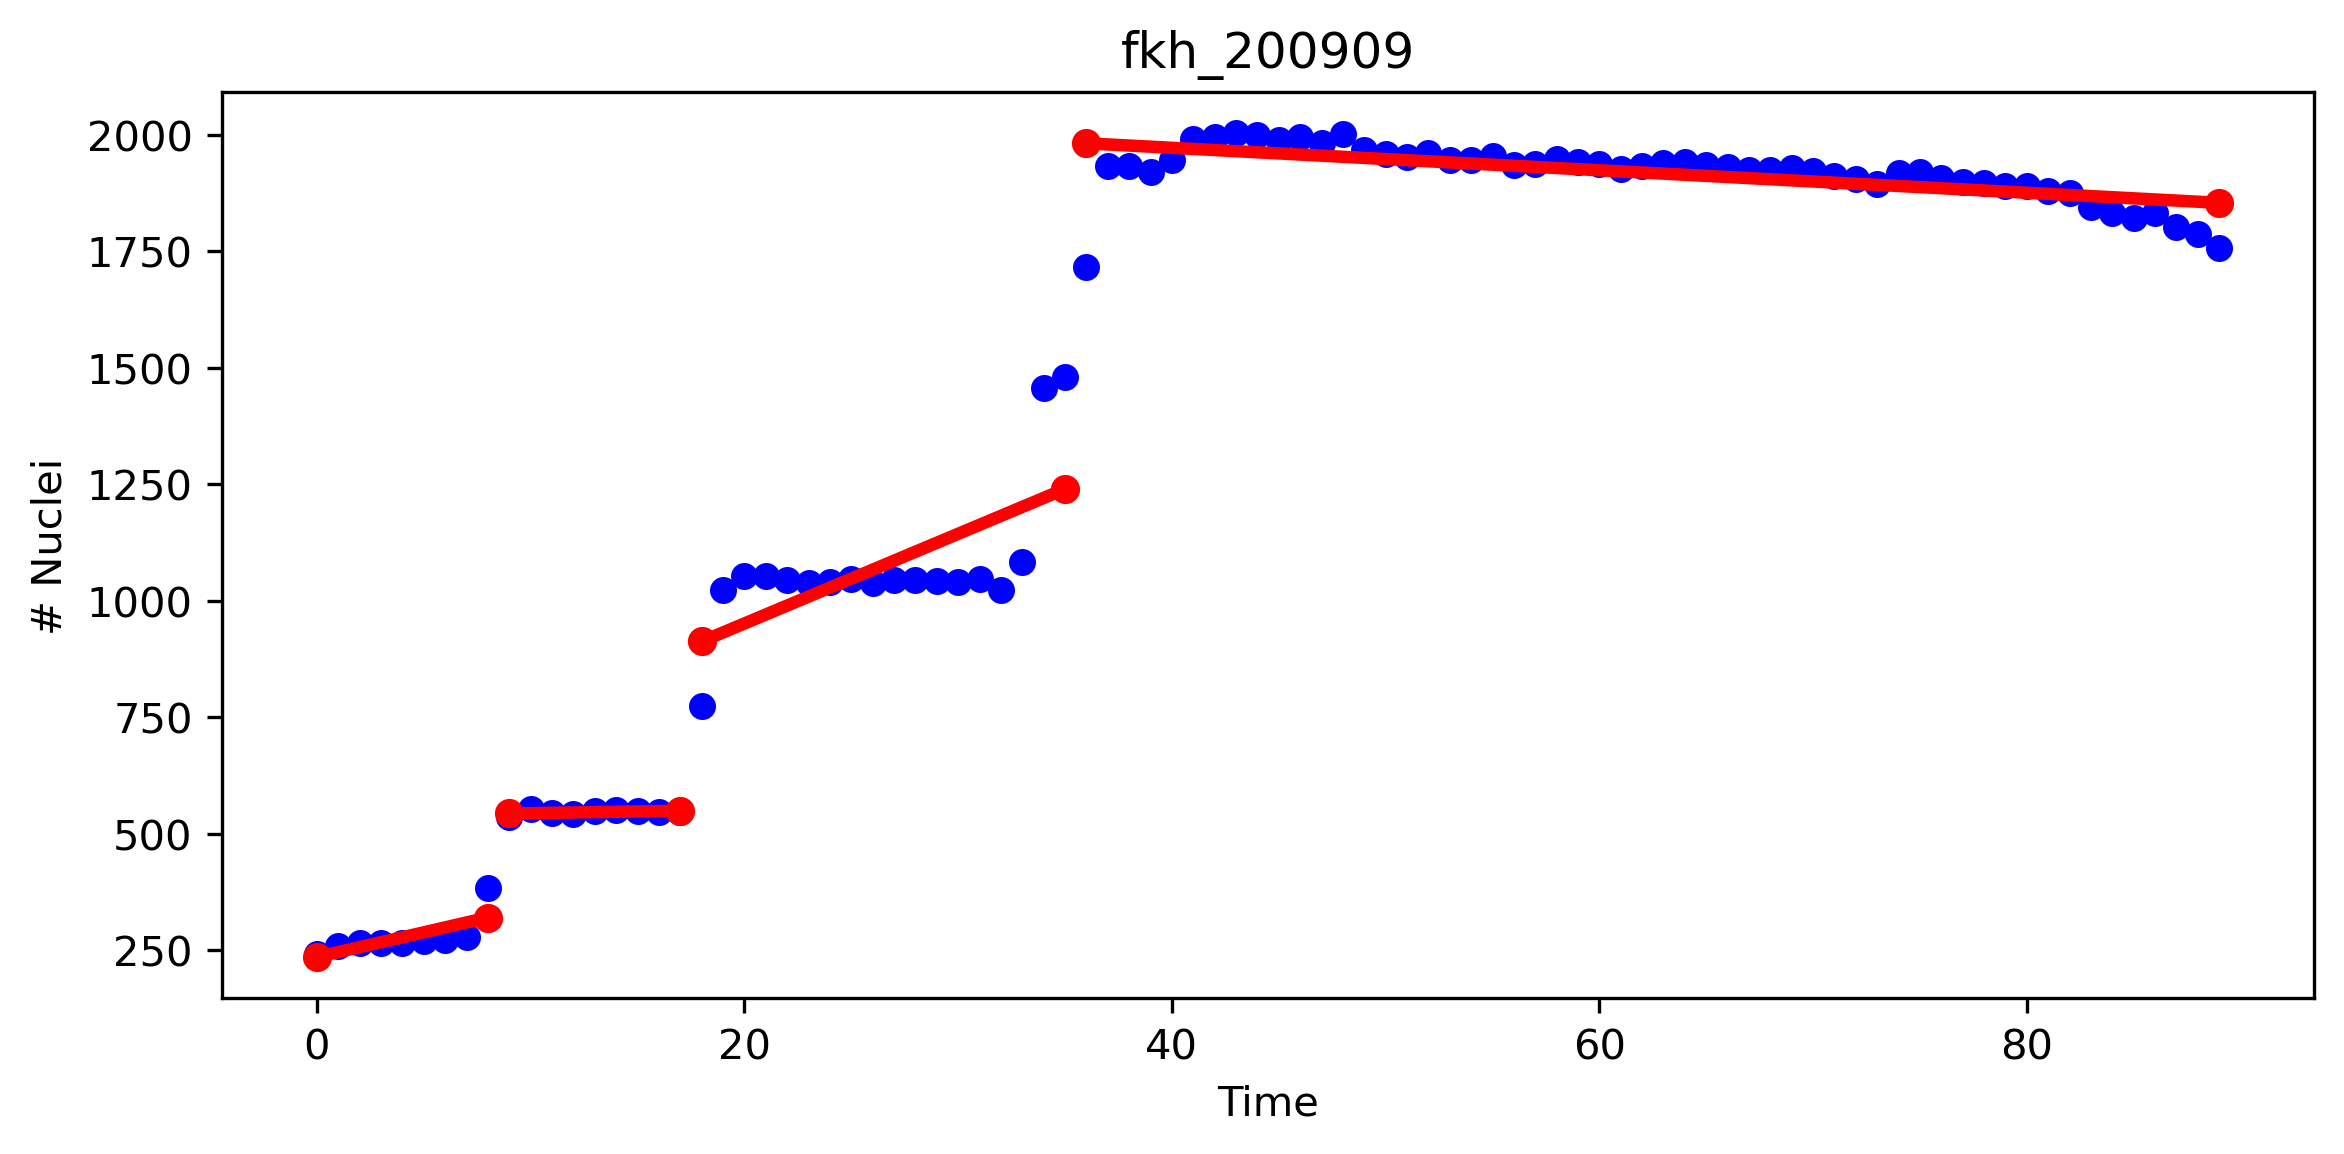

In [8]:
division_times = {}
for samp in samples:
    print(samp)
    my_file = Path(direc[samp]+'division_times_fit.pdf')
    if not my_file.is_file():
        print('Fitting...')
        division_times[samp] = []
        y = to_cons[samp].groupby('Time').size()
        x = list(range(len(y)))

        num_breakpoints = 3
        breakpoints = optimize.brute(
            error_for_piecewise, [slice(0, 15, 1), slice(10, 25, 1), slice(25, 45, 1)], args=(x, y, {}), finish=None)

        plt.figure(figsize = (9,4), dpi = 300)
        plt.scatter(x, y, c='blue', s=30)
        for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
            x_interval = np.array([xi.min(), xi.max()])
            division_times[samp].append(xi.max())
            plt.plot(x_interval, f(x_interval), 'ro-', lw = 3)
        plt.title(samp.lower())
        plt.xlabel('Time')
        plt.ylabel('# Nuclei')
        plt.savefig(direc[samp]+'division_times_fit.pdf')
        division_times[samp] = division_times[samp][:-1]
        print(division_times[samp])
        #plt.show()

In [10]:
with open(results_folder+'Division_times.txt', 'w') as f:
    print(division_times, file=f)

In [11]:
# old_division_times

In [12]:
all_division_times = pd.DataFrame(division_times).T

In [13]:
cycle_lengths = (all_division_times-all_division_times.shift(1, axis = 1)).dropna(1)

/tmp/ipykernel_1088334/691222804.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  cycle_lengths = (all_division_times-all_division_times.shift(1, axis = 1)).dropna(1)


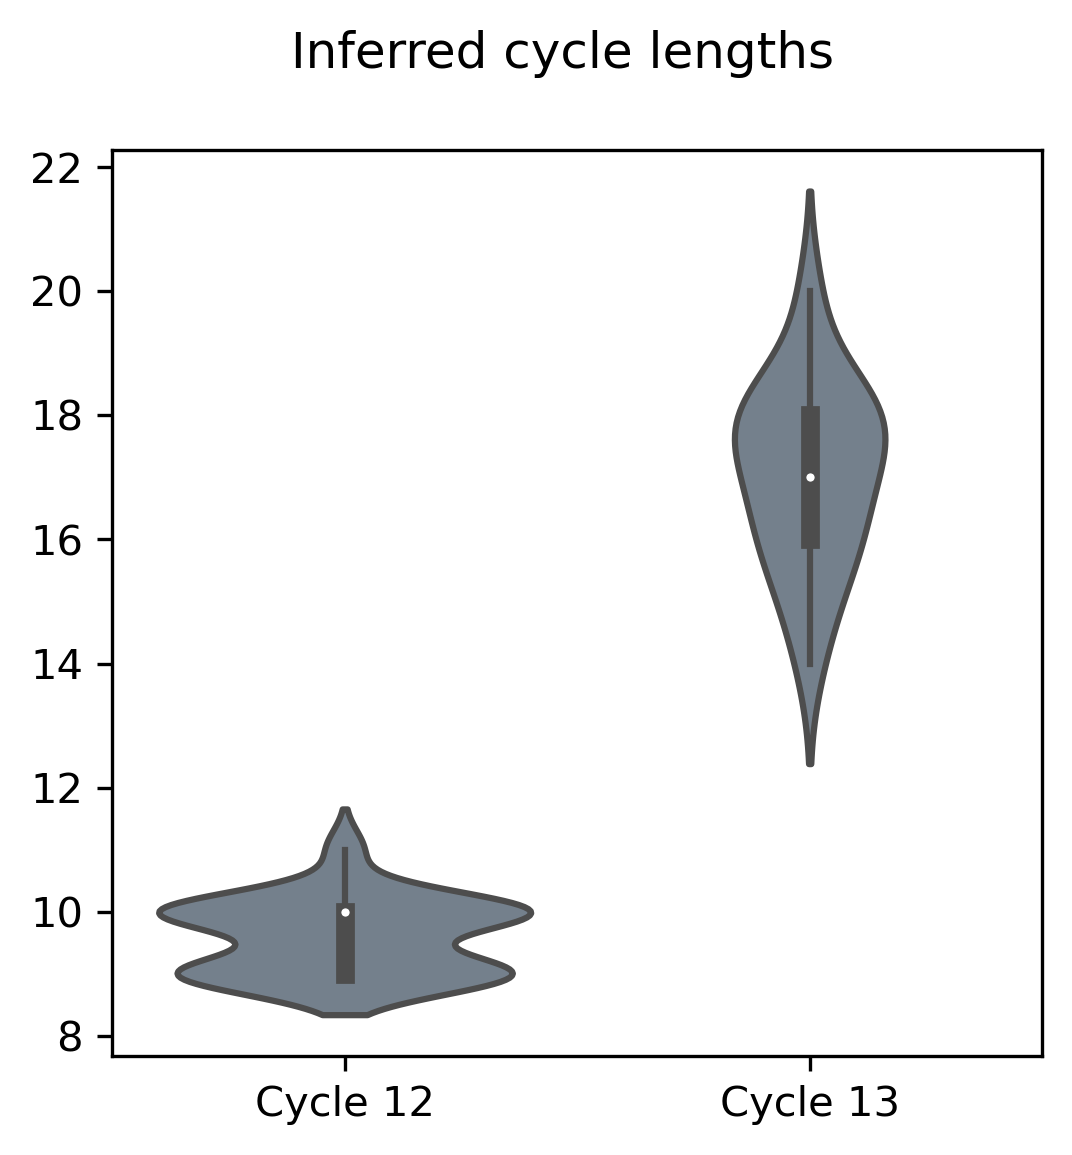

In [14]:
plt.figure(figsize = (4,4),dpi = 300)
cycle_lengths.columns = ['Cycle 12', 'Cycle 13']
#fig, ax = plt.subplot('111',dpi = 300)
ax = plt.gca()
sns.violinplot(ax = ax, data = cycle_lengths, color = 'slategray')
plt.suptitle('Inferred cycle lengths')
plt.savefig(results_folder+'figures/Cycle_lengths.pdf', dpi = 300)

In [15]:
cycle_lengths.mean(0), cycle_lengths.std(0)

(Cycle 12     9.60
 Cycle 13    17.05
 dtype: float64,
 Cycle 12    0.598243
 Cycle 13    1.468081
 dtype: float64)